# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del proyecto es determinar cual tarifa genera más ingresos a Megaline, asi el departamento comercial puede ajustar el presupuesto de publicidad.
Para abordar este problema se inicia con la carga y lectura de los dataset, y se continua con la preparación para el análisis.
Una vez listos los dataset se analizan los datos, buscando conocer como es el comportamiento de los usuario de cada plan, luego se aborda el problema planteado mediante pruebas de hipótesis.
Para luego llegar a las conclusiones y poder responder la pregunta planteada.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math as mt
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt
import datetime as dt
from datetime import datetime

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('megaline_users.csv')
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')

## Preparar los datos

### Plan de solución

- Se utilizarán las siguientes herramientas para obtener información de los dataset:
    - `'sample()'`: para obetner una muestra aleatoria de los datos.
    - `'info()'`: para obtener una descripción general del dataset.
    - `'dtypes'`: para obterner información acerca del tipo de datos de las columnas del dataset.
    - `'describe()'`: donde sea útil para revisar valores de tipo numérico.
    
- Se revisará por valores ausentes, datos duplicados, tipos de dato y se aplicará correcciones donde sea necesario.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print()
print("-- Información general del dataset: \n")
plans.info()

# imprime información acerca del tipo de datos de las columnas del dataset
print()
print("-- Tipos de datos del dataset: \n")
plans.dtypes


-- Información general del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

-- Tipos de datos del dataset: 



messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

In [4]:
# Imprime una muestra de los datos para las tarifas
print("-- Una muestra de los datos del dataset 'plans': \n")
print(plans.head())

-- Una muestra de los datos del dataset 'plans': 

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


### Hallazgos dataset `'plans.csv'`

1. No hay datos ausentes.
2. No hay datos duplicados.
3. Se observa que algunos tipos de datos no corresponden con la información que representan. Por ejemplo:
    - `'usd_monthly_pay'`: El tipo de datos de esta columna es `'int'` se propone cambiar al tipo de datos `'float'`.
    - `'usd_per_gb'`: El tipo de datos de esta columna es `'int'` se propone cambiar a `'float'`.
4. Se puede agregar una columna para indicar la cantidad de datos de cada en plan en unidades de `'Gigabytes'`.

### Corregir datos

1. Se cambia el tipo de datos de la columna `'usd_monthly_pay'` de tipo `'int'` a tipo `'float'`.
2. Se procede de igual forma con los datos de la columna `'usd_per_gb'`.

In [5]:
print()
# Se cambia el tipo de datos de la columnas 'usd_monthly_pay' y 'usd_per_gb' a float
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')

# Se valida que el cambio se halla aplicado correctamente.
print("-- Información general del dataset 'plans': \n")
plans.info()
print()

print("-- Tipos de datos del dataset 'plans': \n")
plans.dtypes


-- Información general del dataset 'plans': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes

-- Tipos de datos del dataset 'plans': 



messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay          float64
usd_per_gb               float64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

### Enriquecer los datos

1. Es de utilidad contar con la cantidad de datos en Gigabytes que ofrece cada plan. Para ello se agrega una columna llamada `'gb_per_month_included'`.
2. Del diccionario de datos se tiene que $1 \,GB = 1024 \,MB$.

In [6]:
# Se crea la nueva columna 'gb_per_month_included'. Se divide los datos de la columna 'mb_per_month_included'
# entre 1024 para obtener la cantidad de datos en Gigabytes. Y se cambia el tipo de dato de la nueva
# columna a 'int'.

plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

# Se valida que se haya creado la nueva columna
print("-- Información general del dataset 'plans': \n")
plans.info()
print()

# Se cambia el tipo de datos de la columna 'gb_per_month_included'
plans['gb_per_month_included'] = plans['gb_per_month_included'].astype('int')

# Se valida que el cambio se halla aplicado correctamente.
print("-- Información general del dataset 'plans': \n")
plans.info()
print()

# Imprime una muestra de los datos para las tarifas
print("-- Una muestra de los datos del dataset 'plans': \n")
print(plans.head())

print("-- Tipos de datos del dataset 'plans': \n")
plans.dtypes


-- Información general del dataset 'plans': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 272.0+ bytes

-- Información general del dataset 'plans': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------     

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay          float64
usd_per_gb               float64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
gb_per_month_included      int64
dtype: object

## Usuarios/as

In [7]:
# Se lee la infomación general del dataset
print("-- Información general del dataset 'users': \n")
users.info()
print()

# Se valida los tipos de datos de las columnas
print("-- Tipos de datos del dataset: \n")
users.dtypes

-- Información general del dataset 'users': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

-- Tipos de datos del dataset: 



user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [8]:
# Imprime una muestra de datos para usuarios
print("-- Una muestra de los datos del dataset 'users': \n")
print(users.sample(n= 5, random_state = 1))
print()

# Se valida si existen filas duplicadas en el dataset
duplicated_users = users.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'users': {duplicated_users}")
print()

# Se valida si existen IDs de usarios duplicados.
duplicated_user_id = users['user_id'].duplicated().sum()
print(f"-- Total de IDs de usuarios duplicados: {duplicated_user_id}")
print()

# Se cuenta la cantidad de 'user_id' únicos
print(f"-- Cantidad de usuarios únicos: {users['user_id'].nunique()}")
print()

# Se cuenta la cantidad de usuarios por cada plan
print(f"-- Cantidad de usuarios por cada plan: \n{users.groupby('plan')['user_id'].count()}")
print()

# Se valida la cantidad de datos nulos o ausentes para la columna 'churn_date'
absent_values_churn_date = users[users['churn_date'].isna()]
print(f"-- Registros con valores ausentes en la columna 'churn_date': \n\n{absent_values_churn_date.head()}")
print()
print(f"-- Cantidad de registros con valores ausentes en la columna 'churn_date': \n{users['churn_date'].isna().sum()}")

-- Una muestra de los datos del dataset 'users': 

     user_id first_name last_name  age  \
304     1304   Dominque      Cole   69   
340     1340      Vanna   Stanton   65   
47      1047        Yuk    French   22   
67      1067       Robt     Allen   37   
479     1479     Keesha   Burnett   44   

                                         city    reg_date      plan  \
304                 Birmingham-Hoover, AL MSA  2018-10-28  ultimate   
340       Dallas-Fort Worth-Arlington, TX MSA  2018-07-05      surf   
47       Indianapolis-Carmel-Anderson, IN MSA  2018-06-16  ultimate   
67              Grand Rapids-Kentwood, MI MSA  2018-09-24      surf   
479  Riverside-San Bernardino-Ontario, CA MSA  2018-11-12      surf   

     churn_date  
304         NaN  
340         NaN  
47          NaN  
67   2018-11-24  
479         NaN  

-- Total de filas duplicadas en el dataset 'users': 0

-- Total de IDs de usuarios duplicados: 0

-- Cantidad de usuarios únicos: 500

-- Cantidad de usuarios p

### Hallazgos dataset `'users'`
1. Los tipos de datos para las columnas `'churn_date'` y `'reg_date'` no corresponden a tipos de datos de fecha. El resto de columnas no tiene problemas con el tipo de datos.
2. No se encontró registros duplicados, ni tampoco IDs de usuarios duplicados.
3. Se encontraron valores ausentes en la columna `'churn_date'` solamente. Que corresponde a usuarios no activos.

### Corregir los datos

- Se cambia el tipo de datos para las columnas `'churn_date'` y `'reg_date'` al tipo `'datetime'`.

In [9]:
# Se realiza la conversión del tipo de datos de las columnas 'churn_date' y 'reg_date'
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Se valida que la conversión se haya realizado correctamente
print("-- Información general del dataset 'users': \n")
users.info()
print()

# Se completan los datos ausentes en la columna 'churn_date' con la palabra 'active' para indicar que el 
# cliente se encuentra actualmente con servicios en la empresa.

users['churn_date'].fillna('active', inplace=True)

print("-- Una muestra de los datos del dataset 'users': \n")
print(users[['user_id', 'churn_date']].sample(n= 5, random_state = 1))
print()

print("-- Información general del dataset 'users': \n")
users.info()
print()

-- Información general del dataset 'users': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

-- Una muestra de los datos del dataset 'users': 

     user_id           churn_date
304     1304               active
340     1340               active
47      1047               active
67      1067  2018-11-24 00:00:00
479     1479               active

-- Información general del dataset 'users':

/tmp/ipykernel_39523/2576554729.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'active' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  users['churn_date'].fillna('active', inplace=True)


### Enriquecer los datos


- No se realiza ninguna acción en esta parte.

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("-- Información general del dataset 'calls':\n")
calls.info()

-- Información general del dataset 'calls':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
print("-- Una muestra de los registros del dataset 'calls:'\n")
print(calls.sample(n = 5, random_state = 1))
print()

# Se valida si existen filas duplicadas en el dataset
duplicated_calls = calls.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'calls': {duplicated_calls}")
print()

# Se valida si existen IDs de llamadas que estén duplicadas.
duplicated_call_id = calls['id'].duplicated().sum()
print(f"-- Total de IDs de llamadas duplicadas: {duplicated_call_id}")
print()

-- Una muestra de los registros del dataset 'calls:'

              id  user_id   call_date  duration
106231  1374_327     1374  2018-12-17      1.17
109017   1385_87     1385  2018-10-20     14.02
76096   1268_600     1268  2018-09-24     12.21
106317  1375_219     1375  2018-12-03      7.03
98706     1354_6     1354  2018-10-16      6.21

-- Total de filas duplicadas en el dataset 'calls': 0

-- Total de IDs de llamadas duplicadas: 0



### Hallazgos dataset `'calls'`
1. No se observan valores aunsentes.
2. No se econtró registros duplicados, ni IDs de llamadas duplicadas.
3. Se observa que la columna `'call_date'` tiene un tipo de dato que no corresponde. Está como tipo `'object'`, debe ser tipo `'datetime'`.

### Corregir los datos

1. Se realiza el cambio de tipo de  dato de la columna `'call_date'`, de `'object'` a `'datetime'`.

In [12]:
# Se realiza la conversion del tipo de datos de las columna 'call_date'
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Se valida que la  conversión se haya realizado correctamente
print("-- Información general del dataset 'calls': \n")
calls.info()
print()

print("-- Una muestra de los datos del dataset 'calls': \n")
print(calls.sample(n= 5, random_state = 1))
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
calls.describe()

-- Información general del dataset 'calls': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

-- Una muestra de los datos del dataset 'calls': 

              id  user_id  call_date  duration
106231  1374_327     1374 2018-12-17      1.17
109017   1385_87     1385 2018-10-20     14.02
76096   1268_600     1268 2018-09-24     12.21
106317  1375_219     1375 2018-12-03      7.03
98706     1354_6     1354 2018-10-16      6.21

-- Se muestra información general acerca de los datos numéricos del dataset:



,user_id,call_date,duration
count,137735.000000,137735,137735.000000
mean,1247.658046,2018-09-25 19:57:56.319018496,6.745927
min,1000.000000,2018-01-15 00:00:00,0.000000
25%,1128.000000,2018-08-08 00:00:00,1.290000
50%,1247.000000,2018-10-12 00:00:00,5.980000
75%,1365.000000,2018-11-26 00:00:00,10.690000
max,1499.000000,2018-12-31 00:00:00,37.600000
std,139.416268,NaN,5.839241


### Enriquecer los datos

1. En el dataset `'calls'` se crean dos columnas para obtener el mes y el día en que se realizó una llamada. Esto puede ser útil para análisis estadísticos y de comportamiento de uso del servicio.
    - Se crea una columna para almacenar el mes de la llamada: `'month'`.
    - Se crea la columna `'day'` para almacenar el día de la llamada.
2. Una vez obtenido el mes de cada llamada se procede a cambiar le número del mes por sus respectivo nombre. Esto hace que el dataset sea más legible.
3. Se encuentran llamadas con una duracion de $0\, minutos$. Se filtran del dataset estas llamadas para no tenerlas encuenta en los análisis estadísticos.
4. Teniendo en cuenta las condiciones del servicio, se redondea las duración de las llamadas al siguiente minuto.

In [13]:
# Con la ayuda de la librería 'datetime (dt)' se extrae el mes y el día de la columna 'call_date'
# se crean dos columnas nuevas 'month' y 'day'.
calls['month'] = (calls['call_date']).dt.month
calls['day'] = (calls['call_date']).dt.day

print("-- Se valida la creación de la nuevas columnas en el dataset 'calls': \n")
calls.info()
print()

# Se crea una función para obtener el nombre del mes a partir del número respectivo.
def name_of_month(month):
    """Esta función toma como entrada un número entre 1 y 12, y devuelve el mes correspondiente a dicho número.
    Empenzando con Enero = 1 y finalizando con Diciemebre = 12"""
    if month == 1:
        return 'January'
    elif month == 2:
        return 'February'
    elif month == 3:
        return 'March'
    elif month == 4:
        return 'April'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'June'
    elif month == 7:
        return 'July'
    elif month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    else:
        return 'December'

# Se realiza el cambio del núnero del mes por su respectivo nombre, con la ayuda del método '.apply()' se llama
# la función 'name_of_month' y se aplica en la columna 'month' del dataset 'calls'

calls['month'] = calls['month'].apply(name_of_month)
print("-- Una muestra de los datos del dataset 'calls': \n")
print(calls[['id', 'call_date', 'month', 'day']].sample(n= 5, random_state = 1))
print()

# Se filtran las llamadas cuya duración es de '0 minutos'
calls = calls[calls['duration'] > 0]

print("-- Información general del dataset 'calls': \n")
calls.info()
print()

print("-- Se valida que la duracion de las llamdas se mayor que '0':\n")
print(calls.describe())
print()

# En el caso de las llamadas, donde la duración se redo es redondea al siguiente minuto, 
# se hace uso de la función ceil() de la librería numpy
calls['duration'] = np.ceil(calls['duration'])

# Se valida que el filtro se haya aplicado correctamente
print("-- Una muestra de los datos del dataset 'calls': \n")
print(calls.sample(n= 5, random_state = 1))
print()

print("-- Se valida que la duración de las llamadas sean valores redondos:\n")
calls.describe()

-- Se valida la creación de la nuevas columnas en el dataset 'calls': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
 5   day        137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 5.3+ MB

-- Una muestra de los datos del dataset 'calls': 

              id  call_date      month  day
106231  1374_327 2018-12-17   December   17
109017   1385_87 2018-10-20    October   20
76096   1268_600 2018-09-24  September   24
106317  1375_219 2018-12-03   December    3
98706     1354_6 2018-10-16    October   16

-- Información general del

,user_id,call_date,duration,day
count,110901.000000,110901,110901.000000,110901.000000
mean,1247.511871,2018-09-25 18:38:58.193524224,8.875907,16.445821
min,1000.000000,2018-01-15 00:00:00,1.000000,1.000000
25%,1127.000000,2018-08-08 00:00:00,5.000000,9.000000
50%,1247.000000,2018-10-12 00:00:00,8.000000,17.000000
75%,1365.000000,2018-11-26 00:00:00,12.000000,24.000000
max,1499.000000,2018-12-31 00:00:00,38.000000,31.000000
std,139.475249,NaN,5.355181,8.812703


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("-- Información general del dataset 'messages':\n")
messages.info()

-- Información general del dataset 'messages':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
print("-- Una muestra de los registros del dataset 'messages:'\n")
print(messages.sample(n = 5, random_state = 1))
print()

# Se valida si existen filas duplicadas en el dataset
duplicated_messages = messages.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'messages': {duplicated_messages}")
print()

# Se valida si existen IDs de llamadas que estén duplicadas.
duplicated_messages_id = messages['id'].duplicated().sum()
print(f"-- Total de IDs de mensajes duplicadas: {duplicated_messages_id}")
print()

-- Una muestra de los registros del dataset 'messages:'

             id  user_id message_date
12922  1084_162     1084   2018-11-17
55949   1354_99     1354   2018-10-04
19111  1123_180     1123   2018-11-04
46123   1314_11     1314   2018-12-15
72141  1467_473     1467   2018-05-18

-- Total de filas duplicadas en el dataset 'messages': 0

-- Total de IDs de mensajes duplicadas: 0



### Hallazgos dataset `'messages'`
1. No se observa datos ausentes.
2. No se econtraron datos duplicados.
3. El tipo de datos para la columna `'message_date'` es `'object'`, debería ser tipo `'datetime'`.

### Corregir los datos

1. Se realiza el cambio del tipo de dato para la columna `'message_date'`. Se cambia el tipo de dato a `'datatime'`.

In [16]:
# Se realiza la conversión del tipo de datos de las columna 'message_date'
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# Se valida que la conversión se haya realizado correctamente
print("-- Información general del dataset 'messages': \n")
messages.info()
print()

print("-- Una muestra de los datos del dataset 'messages': \n")
print(messages.sample(n= 5, random_state = 1))


-- Información general del dataset 'messages': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

-- Una muestra de los datos del dataset 'messages': 

             id  user_id message_date
12922  1084_162     1084   2018-11-17
55949   1354_99     1354   2018-10-04
19111  1123_180     1123   2018-11-04
46123   1314_11     1314   2018-12-15
72141  1467_473     1467   2018-05-18


### Enriquecer los datos

1. En este dataset también se crean dos columnas para obtener el mes y el día en que se envió un mensaje. Esto puede ser útil para el análisis estadísticos, y de comportamiento de uso del servicio.
    - Se crea una columna para almacenar el mes del mensaje: `'month'`.
    - También se crea una columna para almacenar el día en que se envió un mensaje: `'day'`.    
2. También se cambia el número del mes por sus respectivo nombre.

In [17]:
# Con la ayuda de la librería 'datetime (dt)' se extrae el mes y el día de la columna 'message_date'
# se crean dos columnas nuevas 'month' y 'day'.
messages['month'] = (messages['message_date']).dt.month
messages['day'] = (messages['message_date']).dt.day

print("-- Una muestra de los datos del dataset 'messages': \n")
print(messages[['id', 'message_date', 'month', 'day']].sample(n= 5, random_state = 1))
print()

print("-- Se valida la creación de la nuevas columnas en el dataset 'messages': \n")
messages.info()
print()

# Se realiza el cambio del número del mes por su respectivo nombre, con la ayuda del método '.apply()' se llama
# la función 'name_of_month' y se aplica en la columna 'month' del dataset 'messages'
messages['month'] = messages['month'].apply(name_of_month)
print("-- Una muestra de los datos del dataset 'messages': \n")
print(messages[['id', 'message_date', 'month', 'day']].sample(n= 5, random_state = 1))
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
messages.describe()

-- Una muestra de los datos del dataset 'messages': 

             id message_date  month  day
12922  1084_162   2018-11-17     11   17
55949   1354_99   2018-10-04     10    4
19111  1123_180   2018-11-04     11    4
46123   1314_11   2018-12-15     12   15
72141  1467_473   2018-05-18      5   18

-- Se valida la creación de la nuevas columnas en el dataset 'messages': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
 4   day           76051 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 2.3+ MB

-- Una muestra de los datos del dataset 'messages': 

             id message_date    

,user_id,message_date,day
count,76051.000000,76051,76051.000000
mean,1245.972768,2018-10-03 23:51:32.172358144,16.576455
min,1000.000000,2018-01-15 00:00:00,1.000000
25%,1123.000000,2018-08-22 00:00:00,9.000000
50%,1251.000000,2018-10-20 00:00:00,17.000000
75%,1362.000000,2018-12-01 00:00:00,24.000000
max,1497.000000,2018-12-31 00:00:00,31.000000
std,139.843635,NaN,8.822974


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("-- Información general del dataset 'internet':\n")
internet.info()

-- Información general del dataset 'internet':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
print("-- Una muestra de los registros del dataset 'internet': \n")
print(internet.sample(n = 5, random_state = 1))
print()

# Se valida si existen filas duplicadas en el dataset
duplicated_internet = internet.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'internet': {duplicated_internet}")
print()
# Se valida si existen IDs de sesiones de internet que estén duplicadas.
duplicated_internet_id = internet['id'].duplicated().sum()
print(f"-- Total de IDs de sesiones duplicadas: {duplicated_internet_id}")
print()

-- Una muestra de los registros del dataset 'internet': 

             id  user_id session_date  mb_used
13106   1062_76     1062   2018-09-15   225.79
70950  1331_201     1331   2018-09-28   169.69
6195    1035_43     1035   2018-12-27   124.84
2400   1011_140     1011   2018-06-26     0.00
25926   1121_19     1121   2018-12-16   504.92

-- Total de filas duplicadas en el dataset 'internet': 0

-- Total de IDs de sesiones duplicadas: 0



### Hallazgos dataset `'internet.csv'`
1. No se encontraron datos ausentes.
2. No se econtraron datos duplicados, ni `'id'` de sesiones de internet duplicadas.
3. La columna `'session_date'` tiene tipo de dato `'object'`, debería ser tipo `'datetime'`.
4. Se encuentra que la cantidad de datos consumidos por cada usuario se encuentra en unidades de $Megabytes\,$, se propone crear una columna que muestre esta infomración en unidades de $Gigabytes\,$.

### Corregir los datos

1. Se realiza la conversion del tipo de datos de la colimna `'session_date'` de tipo `'object'` a tipo `'datetime'`.

In [20]:
# Se realiza la conversión del tipo de datos de las columna 'session_date'
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

# Se valida que la conversión se haya realizado correctamente
print("-- Información general del dataset 'internet': \n")
internet.info()
print()

print("-- Una muestra de los datos del dataset 'internet': \n")
print(internet.sample(n= 5, random_state = 1))

-- Información general del dataset 'internet': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

-- Una muestra de los datos del dataset 'internet': 

             id  user_id session_date  mb_used
13106   1062_76     1062   2018-09-15   225.79
70950  1331_201     1331   2018-09-28   169.69
6195    1035_43     1035   2018-12-27   124.84
2400   1011_140     1011   2018-06-26     0.00
25926   1121_19     1121   2018-12-16   504.92


### Enriquecer los datos

1. Se crea una columna llamada `'gb_used'` para tener la cantidad de datos por sesión en unidades de $Gigabytes\,$.
    - Del diccionario de datos se tiene que $1 \,GB = 1024 \,MB$
2. Se procede de igual forma como con los datasets anteriores, se crean dos columnas para obtener el mes y el día en que se inició una session de internet. 
    - Se crea una columna para almacenar el mes de la sesion: `'month'`.
    - También se crea una columna para almacenar el día en que se inició una sesión: `'day'`.    
3. También se cambia el número del mes por sus respectivo nombre.
4. Se filtran los datos de las sesiones donde los gigabytes consumidos es igual a 0.

In [21]:
# Se crea la nueva columna 'gb_used'. Se dividen los datos de la columna 'mb_used'
# entre 1024 para obtener la cantidad de datos en Gigabytes. 

internet['gb_used'] = internet['mb_used'] / 1024

# Se valida que se haya creado la nueva columna
print("-- Información general del dataset 'internet': \n")
internet.info()
print()

print("-- Una muestra de los datos del dataset 'internet': \n")
print(internet.sample(n= 5, random_state = 1))
print()

# Con la ayuda de la librería 'datetime (dt)' se extrae el mes y el día de la columna 'session_date'
# se crean dos columnas nuevas 'month' y 'day'.
internet['month'] = (internet['session_date']).dt.month
internet['day'] = (internet['session_date']).dt.day

print("-- Una muestra de los datos del dataset 'internet': \n")
print(internet[['id', 'session_date', 'month', 'day']].sample(n= 5, random_state = 1))
print()

print("-- Se valida la creación de la nuevas columnas en el dataset 'messages': \n")
internet.info()
print()

# Se realiza el cambio del núnero del mes por su respectivo nombre, con la ayuda del método '.apply()' se llama
# la función 'name_of_month' y se aplica en la columna 'session_month' del dataset 'internet'
internet['month'] = internet['month'].apply(name_of_month)
print("-- Una muestra de los datos del dataset 'interntet': \n")
print(internet[['id', 'session_date', 'month', 'day']].sample(n= 5, random_state = 1))
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
internet.describe()

# Se filtran los datos donde los datos consumidos son iguales a 0
internet = internet[internet['gb_used'] > 0]

print("-- Una muestra de los datos del dataset 'interntet': \n")
print(internet.sample(n= 5, random_state = 1))
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset 'internet':\n")
internet.describe()


-- Información general del dataset 'internet': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ MB

-- Una muestra de los datos del dataset 'internet': 

             id  user_id session_date  mb_used   gb_used
13106   1062_76     1062   2018-09-15   225.79  0.220498
70950  1331_201     1331   2018-09-28   169.69  0.165713
6195    1035_43     1035   2018-12-27   124.84  0.121914
2400   1011_140     1011   2018-06-26     0.00  0.000000
25926   1121_19     1121   2018-12-16   504.92  0.493086

-- Un

,user_id,session_date,mb_used,gb_used,day
count,91078.000000,91078,91078.000000,91078.000000,91078.000000
mean,1242.576923,2018-09-26 09:15:17.095236608,422.064206,0.412172,16.443883
min,1000.000000,2018-01-15 00:00:00,0.010000,0.000010,1.000000
25%,1122.000000,2018-08-11 00:00:00,223.380000,0.218145,9.000000
50%,1236.000000,2018-10-12 00:00:00,395.905000,0.386626,17.000000
75%,1367.000000,2018-11-26 00:00:00,588.367500,0.574578,24.000000
max,1499.000000,2018-12-31 00:00:00,1693.470000,1.653779,31.000000
std,141.992374,NaN,255.063501,0.249085,8.828481


## Estudiar las condiciones de las tarifas

1. Surf:
    - Pago mensual: `'$20'`.
    - 500 minutos al mes, 50 SMS y 15 GB de datos.
        - Si se exceden los límites del paquete:
            - 1 minuto: 3 centavos.
            - 1 SMS: 3 centavos.
            - 1 GB de datos: `'$10'`

2. Ultimate:
    - Pago mensual: `'$70'`
    - 3000 minutos al mes, 1000 SMS y 30 GB de datos.
        - Si se exceden los límites del paquete:
            - 1 minuto: 1 centavo.
            - 1 SMS: 1 centavo.
            - 1 GB de datos: `'$7'`

- *Condiciones:*
    - Megaline redondea los segundos a minutos y los megabytes a gigabytes. 
    - Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. 
    - Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("-- Una muestra de los datos del dataset: \n")
print(plans.head())

-- Una muestra de los datos del dataset: 

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0             20.0        10.0             0.03            0.03      surf   
1             70.0         7.0             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Agregar datos por usuario

En esta parte del analísis se agrupa cada servicio por usuarios y se consolidan los consumos por periodo, en este caso, por mes.

### Llamadas por cada usuario al mes
- Se realiza una doble agrupación de los datos, por usuario y por mes, y se realiza la cuenta de los `'id'` de cada llamada. 
- Así se obtiene un dataset con los datos del número de llamadas realizadas por cada usuario en cada mes.

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Se agrupa por 'user-id' y 'months' y se cuenta la cantidad de llamadas, y se determina su duración.
# Luego se resetean los indices del dataframe.
#calls_per_user = calls.groupby(by=['user_id', 'month'])['id'].count()
#calls_per_user = calls_per_user.reset_index()

calls_per_user = calls.pivot_table(index=['user_id', 'month'],
                                  values=['duration'],
                                  aggfunc=['sum', 'count']).reset_index()

# Se renombran las columnas de la tabla pivote obtenida
calls_per_user.columns = ['_'.join(str(s).strip() for s in col if s) for col in calls_per_user.columns]
print(f"-- Número de llamadas por cada usuario por mes: \n{calls_per_user.head(10)}")
print()

# Se valida el número de ususario que utilizaron el servicio
print(f"En total {calls['user_id'].nunique()} usuarios realizaron al menos una llamada.")
print()
print("-- Se valida que la duración de las llamadas, y que el número de llamadas, se mayor que '0':\n")
calls_per_user.describe()

-- Número de llamadas por cada usuario por mes: 
   user_id      month  sum_duration  count_duration
0     1000   December         124.0              16
1     1001     August         182.0              22
2     1001   December         412.0              46
3     1001   November         426.0              49
4     1001    October         393.0              47
5     1001  September         315.0              38
6     1002   December         384.0              38
7     1002   November         386.0              48
8     1002    October          59.0               8
9     1003   December        1104.0             118

En total 481 usuarios realizaron al menos una llamada.

-- Se valida que la duración de las llamadas, y que el número de llamadas, se mayor que '0':



,user_id,sum_duration,count_duration
count,2256.000000,2256.000000,2256.000000
mean,1247.172872,436.324025,49.158245
std,143.331973,231.711444,25.667968
min,1000.000000,2.000000,1.000000
25%,1122.000000,275.000000,32.000000
50%,1246.000000,429.000000,48.000000
75%,1370.000000,575.250000,64.000000
max,1499.000000,1510.000000,167.000000


### Duración de las llamadas por usuario
- Al igual que en el paso anterior se realiza una doble agrupacion de los datos, por usuario y por mes, pero esta vez se realiza la suma de los datos de la columna `'duration'`.
- Se obtiene un dataset con los datos de los minutos consumidos por cada usuario por mes.

In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Se agrupa por 'user-id' y 'months' y se suman los minutos de la columna 'duration'.
# Luego se resetean los indices del dataframe.

minutes_per_user = calls.groupby(by=['user_id', 'month'])['duration'].sum()
minutes_per_user = minutes_per_user.reset_index()
print(f"-- Cantidad de minutos por cada usuario por mes: \n{minutes_per_user.head(10)}")
print()

# Se valida el número de ususario que utilizaron el servicio
print(f"En total {calls['user_id'].nunique()} usuarios realizaron al menos una llamada.")

-- Cantidad de minutos por cada usuario por mes: 
   user_id      month  duration
0     1000   December     124.0
1     1001     August     182.0
2     1001   December     412.0
3     1001   November     426.0
4     1001    October     393.0
5     1001  September     315.0
6     1002   December     384.0
7     1002   November     386.0
8     1002    October      59.0
9     1003   December    1104.0

En total 481 usuarios realizaron al menos una llamada.


### Número de mensajes por usuario
- De nuevo se realiza una doble agruapción de los datos, esta vez en el dataset `'messages'`. Se agrupa por usuarios y por mes; y se realiza la cuenta de los `'id'` de los mensajes de texto.
- Se obtiene un  dataset con la información del número de mensajes enviados por cada usuario por mes.

In [25]:
# Se agrupa por 'user_id' y 'month' y se cuentan los 'id' messages.
# Y se resetean los índices
messages_per_user = messages.groupby(by=['user_id', 'month'])['id'].count()
messages_per_user = messages_per_user.reset_index()
print(f"-- Cantidad de mensajes por cada usuario por mes: \n{messages_per_user.head(10)}")
print()

# Se valida el número de usuarios que utilizaron el servicio
print(f"En total {messages['user_id'].nunique()} usarios enviaron un mensaje de texto.")

-- Cantidad de mensajes por cada usuario por mes: 
   user_id      month  id
0     1000   December  11
1     1001     August  30
2     1001   December  44
3     1001   November  36
4     1001    October  53
5     1001  September  44
6     1002   December  41
7     1002   November  32
8     1002    October  15
9     1003   December  50

En total 402 usarios enviaron un mensaje de texto.


### Tráfico de datos consumido por usuario
- Se realiza una doble agrupación de los datos, por usuario y por mes, en el dataset `'internet'`, y se realiza la suma del tráfico en *GB* consumido por cada usuario.
- Se obtiene un dataset con la informacion del tráfico gastado por cada usuario por mes.

In [26]:
# Se agrupa por 'user_id' y 'month' y se suma el tráfico en 'GB' para cada sesión.
# Y se resetean los índices.
traffic_per_user = internet.groupby(by=['user_id', 'month'])['gb_used'].sum()
traffic_per_user = traffic_per_user.reset_index()
print(f"-- Cantidad de tráfico por cada usuario por mes: \n{traffic_per_user.head(10)}")
print()

# Se valida el número de usuarios que utilizaron el servicio
print(f"En total {internet['user_id'].nunique()} usuarios consumieron datos.")

-- Cantidad de tráfico por cada usuario por mes: 
   user_id      month    gb_used
0     1000   December   1.856904
1     1001     August   6.756982
2     1001   December  18.915215
3     1001   November  18.070605
4     1001    October  21.807119
5     1001  September  13.002754
6     1002   December  14.058828
7     1002   November  18.891680
8     1002    October   6.398447
9     1003   December  26.410293

En total 489 usuarios consumieron datos.


### Datos agregados de consumo por usuario
- Se fusionan los datasets obtenidos en los pasos anteriores para consolidar toda la información de consumo de cada servicio y de cada usuario por mes en un solo DataFrame.

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Se realiza la fusión de las tablas de llamadas ('calls_per_user'), y la tabla 'messages_per_user'. 
# Se crea la tabla 'expends_per_user'.
# Se utiliza un outer join para poder fusionar todos los 'users_id' de la tabla calls, con los de la tabla messages.
expends_per_user = pd.merge(calls_per_user, messages_per_user, on=['user_id', 'month'], how='outer')
print(f"-- Consumo de llamadas y mensajes por usuario por mes: \n{expends_per_user.head(10)}")
print()

# Luego el dataset 'expends_per_user' se fusiona con el dataset 'traffic_per_user'.
# También se utiliza un outer join para garantizar tener datos de los user_id de las dos tablas.
# Con esto la tabla 'expends_per_user' contiene todos los consumos de servicios por cliente y por mes.
expends_per_user = pd.merge(traffic_per_user,expends_per_user, on=['user_id', 'month'], how='outer')

# Se renombran algunas columnas del dataset 'expends_per_user' para una mejor presentación de dicho datset
new_names_cols = {
    'count_duration': 'total_calls',
    'sum_duration': 'minutes_expend',
    'id': 'messages_expend',
    'gb_used':'gb_traffic_expend'    
}
expends_per_user.rename(columns=new_names_cols, inplace=True)

print(f"-- Consumo de servicios por usuario por mes: \n{expends_per_user.head(10)}")
print()

print("-- Se hace una revisión general del nuevo dataset:")
expends_per_user.info()
print()

# Se observan valores ausentes de consumos en las columnas 'total_calls', 'minutes_expend', 'messages_expend', y 
# gb_traffic_expend se procede a completar esta información con el valor 0, indicando que no hubo 
# consumo en el servicio por parte del usuario

expends_per_user['total_calls'].fillna(0, inplace=True)
expends_per_user['gb_traffic_expend'].fillna(0, inplace=True)
expends_per_user['minutes_expend'].fillna(0, inplace=True)
expends_per_user['messages_expend'].fillna(0, inplace=True)

print("-- Se valida que no existan valores ausentes:\n")
expends_per_user.info()


-- Consumo de llamadas y mensajes por usuario por mes: 
   user_id      month  sum_duration  count_duration    id
0     1000   December         124.0            16.0  11.0
1     1001     August         182.0            22.0  30.0
2     1001   December         412.0            46.0  44.0
3     1001   November         426.0            49.0  36.0
4     1001    October         393.0            47.0  53.0
5     1001  September         315.0            38.0  44.0
6     1002   December         384.0            38.0  41.0
7     1002   November         386.0            48.0  32.0
8     1002    October          59.0             8.0  15.0
9     1003   December        1104.0           118.0  50.0

-- Consumo de servicios por usuario por mes: 
   user_id      month  gb_traffic_expend  minutes_expend  total_calls  \
0     1000   December           1.856904           124.0         16.0   
1     1001     August           6.756982           182.0         22.0   
2     1001   December          18.915215

### Informacion de la tarifa
- Al dataset con la información consolidada de los consumos de los usuarios se le agrega la información de la tarifa y los límites de consumo de cada plan.

In [29]:
# Añade la información de la tarifa
# Se fusionan los dos datasets ('expends_per_user' y 'users'). Del dataset 'users' solo
# extraemos la información del nombre del plan. Se hace un join left para garantizar que se tiene encuenta
# los datos de user_id del dataset 'expend_per_user'.
# Nuestro dataset ahora contiene los consumos por cada servicio y por mes de cada usuario y el nombre del plan 
# que tiene contratado.

expends_per_user = pd.merge(expends_per_user, users[['user_id', 'plan']], on='user_id', how='left')
print(f"-- Consumo de servicios y plan del usuario: \n{expends_per_user.head(10)}")
print()

expends_per_user_tariff = pd.merge(
    expends_per_user,
    plans[['plan_name',
           'messages_included',
           'gb_per_month_included',
           'minutes_included',
           'usd_monthly_pay',
           'usd_per_gb',
           'usd_per_message',
           'usd_per_minute']], 
    left_on='plan',
    right_on='plan_name',
    how='outer')
print(f"-- Consumo de servicios y tarifas: \n{expends_per_user_tariff.head(10)}")
print()

print(f"-- Información general del dataset 'expends_per_user':\n")
expends_per_user_tariff.info()
print()

# Se elimina na de las columnas con la información de los nombres de los planes
expends_per_user_tariff.drop('plan_name', axis=1, inplace=True)

# Se valida que la accion se haya ejecutado correctamente
print(f"-- Información general del dataset 'expends_per_user_tariff':\n")
expends_per_user_tariff.info()
print()

-- Consumo de servicios y plan del usuario: 
   user_id      month  gb_traffic_expend  minutes_expend  total_calls  \
0     1000   December           1.856904           124.0         16.0   
1     1001     August           6.756982           182.0         22.0   
2     1001   December          18.915215           412.0         46.0   
3     1001   November          18.070605           426.0         49.0   
4     1001    October          21.807119           393.0         47.0   
5     1001  September          13.002754           315.0         38.0   
6     1002   December          14.058828           384.0         38.0   
7     1002   November          18.891680           386.0         48.0   
8     1002    October           6.398447            59.0          8.0   
9     1003   December          26.410293          1104.0        118.0   

   messages_expend      plan  
0             11.0  ultimate  
1             30.0      surf  
2             44.0      surf  
3             36.0      sur

### Cálculos de los ingresos por usuario.
- Primero se calcula el consumo excedente de cada usuarios, es decir si gastaron más de lo permitido en su plan.
- En el caso de la tarifa de datos es necesario redondear el consumo final.

In [30]:
# Calcula el ingreso mensual para cada usuario

# Se calculan los consumos por cada servicio descontando lo contratado en cada plan.
expends_per_user_tariff['messages_used'] = expends_per_user_tariff['messages_expend'] - expends_per_user_tariff['messages_included'] 
expends_per_user_tariff['minutes_used'] = expends_per_user_tariff['minutes_expend'] - expends_per_user_tariff['minutes_included']
expends_per_user_tariff['gb_traffic_used'] = expends_per_user_tariff['gb_traffic_expend'] - expends_per_user_tariff['gb_per_month_included']

print(f"-- Se valida que las columnas se hayan creado correctamente:\n")
expends_per_user_tariff.info()   
print()
print(f"-- Una muestra de los datos del dataset:\n {expends_per_user_tariff[['user_id', 'messages_used', 'minutes_used','gb_traffic_used']].head(10)}")
print()

# Para aquellos casos donde el usuario no consumió más de lo permitido por su plan, estos valores se reemplazan por 0.
expends_per_user_tariff.loc[expends_per_user_tariff['messages_used'] < 0, 'messages_used'] = 0
expends_per_user_tariff.loc[expends_per_user_tariff['minutes_used'] < 0, 'minutes_used'] = 0
expends_per_user_tariff.loc[expends_per_user_tariff['gb_traffic_used'] < 0, 'gb_traffic_used'] = 0

print(f"-- Se valida que el reemplazo se halla realizado correctamente:\n {expends_per_user_tariff[['user_id', 'messages_used', 'minutes_used','gb_traffic_used']].head(10)}")
print()

# En el caso de la tarifa de datos, donde el consumo es redondeado al final del mes al siguiente entero
# se hace uso de la función ceil() de la librería numpy
expends_per_user_tariff['gb_traffic_used'] = np.ceil(expends_per_user_tariff['gb_traffic_used'])
print(f"-- Una muestra del dataset:\n {expends_per_user_tariff[['user_id', 'gb_traffic_used']].head(10)}")
print()

-- Se valida que las columnas se hayan creado correctamente:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   object 
 2   gb_traffic_expend      2293 non-null   float64
 3   minutes_expend         2293 non-null   float64
 4   total_calls            2293 non-null   float64
 5   messages_expend        2293 non-null   float64
 6   plan                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   gb_per_month_included  2293 non-null   int64  
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_pay        2293 non-null   float64
 11  usd_per_gb             2293 non-null   float64
 12  usd_per_message        2293 non-null   float64
 13  usd_per_minute         2293 non-null   float64

In [31]:
# Se aplican los valores para el consumo por encima de cada plan.
expends_per_user_tariff['messages_bill'] = np.where(expends_per_user_tariff['plan'] == 'surf', expends_per_user_tariff['messages_used'] * 0.03, expends_per_user_tariff['messages_used'] * 0.01)
expends_per_user_tariff['calls_bill'] = np.where(expends_per_user_tariff['plan'] == 'surf', expends_per_user_tariff['minutes_used'] * 0.03, expends_per_user_tariff['minutes_used'] * 0.01) 
expends_per_user_tariff['traffic_bill'] = np.where(expends_per_user_tariff['plan'] == 'surf', expends_per_user_tariff['gb_traffic_used'] * 10, expends_per_user_tariff['gb_traffic_used'] * 7) 
print(f"-- Se muestran los servicios facturados: \n{expends_per_user_tariff[['user_id', 'messages_bill', 'calls_bill','traffic_bill']].head(10)}")
print()

# Se calcula el monto total a facturar por cada usuario
expends_per_user_tariff['month_user_bill'] = expends_per_user_tariff['usd_monthly_pay'] + expends_per_user_tariff['messages_bill'] + expends_per_user_tariff['calls_bill'] + expends_per_user_tariff['traffic_bill']
print(f"-- Se muestra el consumo por mes facturado: \n{expends_per_user_tariff[['user_id', 'month', 'month_user_bill']].head(10)}")


-- Se muestran los servicios facturados: 
   user_id  messages_bill  calls_bill  traffic_bill
0     1000            0.0         0.0           0.0
1     1006            0.0         0.0          14.0
2     1006            0.0         0.0           0.0
3     1008            0.0         0.0           0.0
4     1008            0.0         0.0           0.0
5     1008            0.0         0.0           0.0
6     1011            0.0         0.0           0.0
7     1011            0.0         0.0           0.0
8     1011            0.0         0.0           0.0
9     1011            0.0         0.0           0.0

-- Se muestra el consumo por mes facturado: 
   user_id     month  month_user_bill
0     1000  December             70.0
1     1006  December             84.0
2     1006  November             70.0
3     1008  December             70.0
4     1008  November             70.0
5     1008   October             70.0
6     1011    August             70.0
7     1011  December             70.

## Estudia el comportamiento de usuario

- Se analiza el comportameinto de los usuarios para cada servicio, acorde al plan contratado.

### Llamadas

-- Subset para el plan 'surf': 
     user_id  plan      month  minutes_expend
720     1001  surf     August           182.0
721     1001  surf   December           412.0
722     1001  surf   November           426.0
723     1001  surf    October           393.0
724     1001  surf  September           315.0

-- Subset para el plan 'ultimate': 
   user_id      plan     month  minutes_expend
0     1000  ultimate  December           124.0
1     1006  ultimate  December            59.0
2     1006  ultimate  November            10.0
3     1008  ultimate  December           634.0
4     1008  ultimate  November           446.0

-- Duración promedio de las llamadas por mes en el plan 'surf': 
436.80

-- Duración promedio de las llamadas por mes en el plan 'ultimate': 
435.29

-- Duración de las llamadas por mes plan 'surf':
month
January         406.0
February       2673.0
March          7590.0
April         17577.0
May           30768.0
June          41836.0
July          54448.0
August       

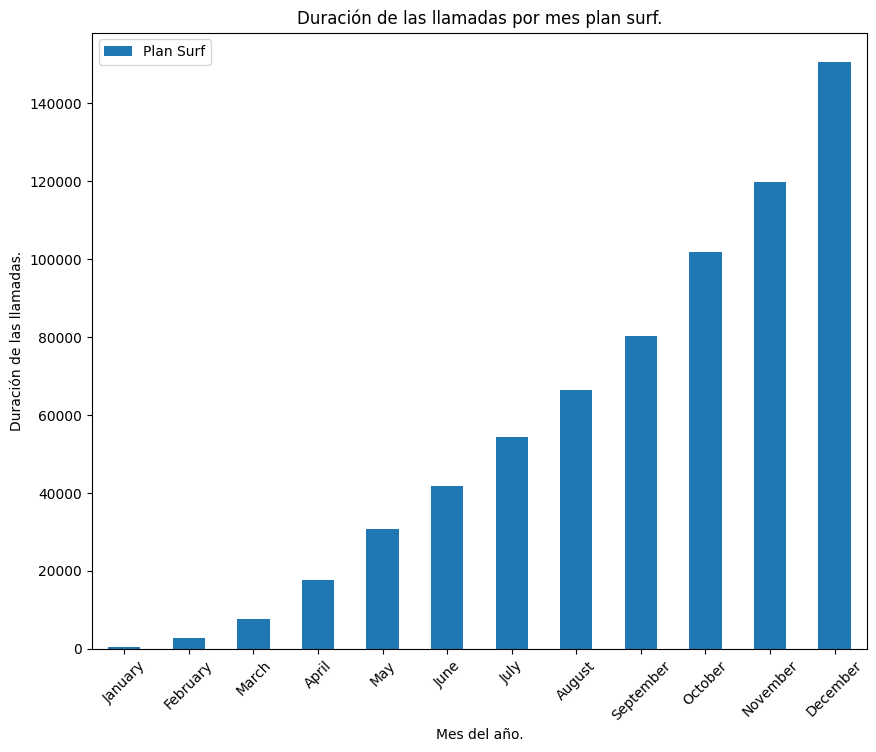

-- Duración de las llamadas por mes plan 'ultimate':
month
January        774.0
February      2822.0
March         3651.0
April         7074.0
May          11781.0
June         17435.0
July         25197.0
August       29922.0
September    37626.0
October      47778.0
November     56540.0
December     69324.0
Name: minutes_expend, dtype: float64

Duración de las llamadas por cada mes para  el plan 'ultimate':



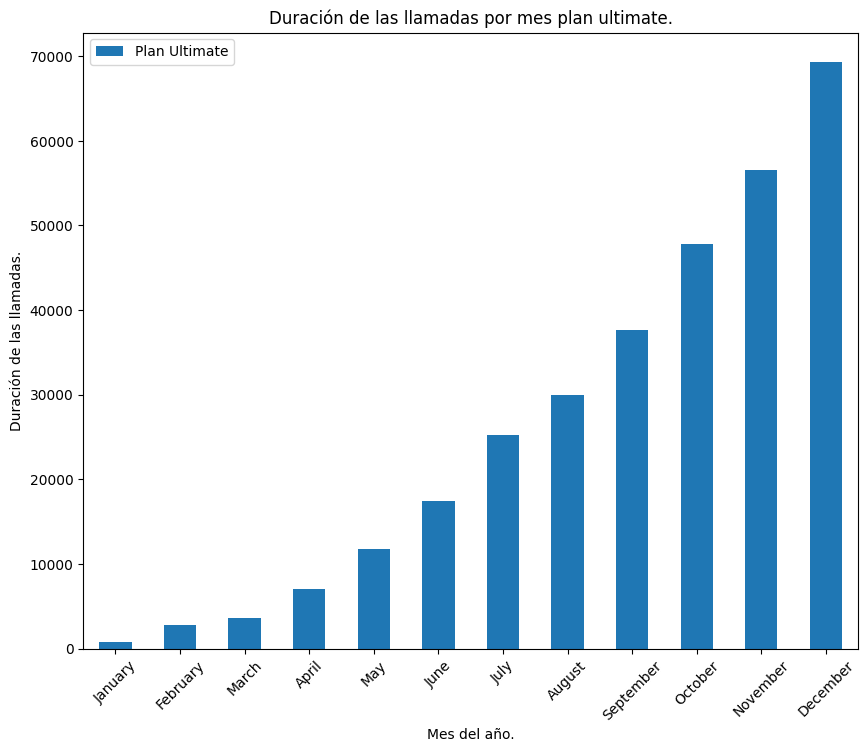

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Duración de las llamadas promedio por cada plan
# Primero se crean dos subsets a partir del dataset de datos agragados, para tener la información
# separada por cada plan.

# Se crean los querys para filtrar los datos requeridos
cols = ['user_id', 'plan', 'month', 'minutes_expend']
q_surf = "(plan == 'surf') and (minutes_expend > 0)"
q_ultimate = "(plan == 'ultimate') and (minutes_expend > 0)"

# Se crea el subset 'expends_plan_surf' para almacenar la información para el plan 'surf'
calls_plan_surf = expends_per_user_tariff.query(q_surf)[cols]
print(f"-- Subset para el plan 'surf': \n{calls_plan_surf[['user_id', 'plan', 'month', 'minutes_expend']].head(5)}")
print()

# Se crea el subset 'expends_plan_ultimate' para almacenar la información para el plan 'ultimate'
calls_plan_ultimate = expends_per_user_tariff.query(q_ultimate)[cols]
print(f"-- Subset para el plan 'ultimate': \n{calls_plan_ultimate[['user_id', 'plan', 'month', 'minutes_expend']].head(5)}")
print()

# Se calcula la duración media de las llamadas para el plan surf
print(f"-- Duración promedio de las llamadas por mes en el plan 'surf': \n{calls_plan_surf['minutes_expend'].mean():.2f}")
print()
# Se calcula la duración media de las llamadas para el plan ultimate
print(f"-- Duración promedio de las llamadas por mes en el plan 'ultimate': \n{calls_plan_ultimate['minutes_expend'].mean():.2f}")
print()

# Se obtiene la duración de las llamadas cada mes, de acuerdo al plan, y luego se grafica dicho resultado.
# Duración de las llamadas por mes para el plan surf. También se elimina el registro con valor 0 de la tabla,
# para mejorar la visualizacion de los gráficos.

duration_surf =  calls_plan_surf.groupby('month')['minutes_expend'].sum().sort_values()
print(f"-- Duración de las llamadas por mes plan 'surf':\n{duration_surf}")
print()

print("Duración de las llamadas por mes para  el plan 'surf':\n")
duration_surf.plot(
    x='month',
    y='minutes_expend',
    kind='bar',
    title='Duración de las llamadas por mes plan surf.',
    xlabel='Mes del año.',
    ylabel="Duración de las llamadas.",
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan Surf'])
plt.show()

# Duración de las llamadas por cada mes para el plan ultimate
duration_ultimate =  calls_plan_ultimate.groupby('month')['minutes_expend'].sum().sort_values()
print(f"-- Duración de las llamadas por mes plan 'ultimate':\n{duration_ultimate}")
print()

print("Duración de las llamadas por cada mes para  el plan 'ultimate':\n")
duration_ultimate.plot(
    x='month',
    y='minutes_expend',
    kind='bar',
    title='Duración de las llamadas por mes plan ultimate.',
    xlabel='Mes del año.',
    ylabel='Duración de las llamadas.',
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan Ultimate'])
plt.show()


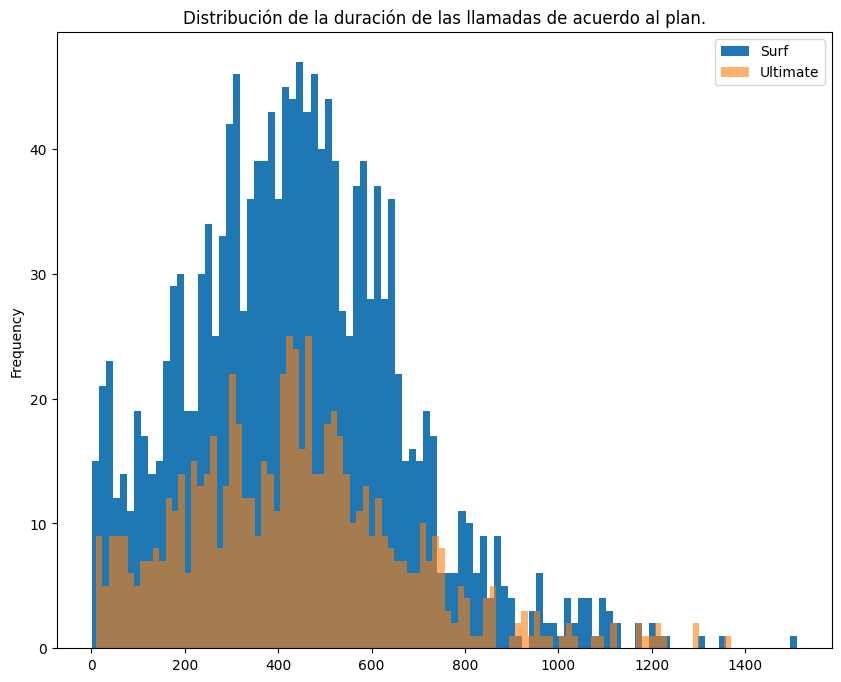

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Se crea un histograma doble para mostrar la cantidad de minutos consumidas por cada plan
calls_plan_surf['minutes_expend'].plot(
    kind='hist',
    bins=100,
    title='Distribución de la duración de las llamadas de acuerdo al plan.',
    xlabel='Duración de la llamda [min]',
    ylabel='Frequency',
    figsize=(10, 8)
    

)
calls_plan_ultimate['minutes_expend'].plot(
    kind='hist',
    bins=100,
    alpha=0.6
)

plt.legend(['Surf', 'Ultimate'])
plt.show()

Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Se calcula la duración media de las llamadas para el plan surf
print(f"-- Duración promedio de las llamadas por mes en el plan 'surf': {calls_plan_surf['minutes_expend'].mean():.2f}")
print()

# Se calcula la mediana de las llamadas para el plan surf
print(f"-- Mediana de las llamadas por mes en el plan 'surf': {calls_plan_surf['minutes_expend'].median():.2f}")
print()

# Se calcula la varianza de la duración de las llamadas para el plan surf
print(f"-- Varianza de la duración de las llamadas por mes en el plan 'surf': {np.var(calls_plan_surf['minutes_expend']):.2f}")
print()

# Sa calcula la duración media de las llamadas para el plan ultimate
print(f"-- Duración promedio de las llamadas por mes en el plan 'ultimate': {calls_plan_ultimate['minutes_expend'].mean():.2f}")
print()

# Se calcula la mediana de las llamadas para el plan ultimate
print(f"-- Mediana de las llamadas por mes en el plan 'ultimate': {calls_plan_ultimate['minutes_expend'].median():.2f}")
print()

# Se calcula la varianza de la duración de las llamadas para el plan ultimate
print(f"-- Varianza de la duración de las llamadas por mes en el plan 'ultimate': {np.var(calls_plan_ultimate['minutes_expend']):.2f}")


-- Duración promedio de las llamadas por mes en el plan 'surf': 436.80

-- Mediana de las llamadas por mes en el plan 'surf': 430.00

-- Varianza de la duración de las llamadas por mes en el plan 'surf': 52447.57

-- Duración promedio de las llamadas por mes en el plan 'ultimate': 435.29

-- Mediana de las llamadas por mes en el plan 'ultimate': 425.50

-- Varianza de la duración de las llamadas por mes en el plan 'ultimate': 56307.89


-- Diagrama de cajas para la duración de las llamadas del plan 'surf':



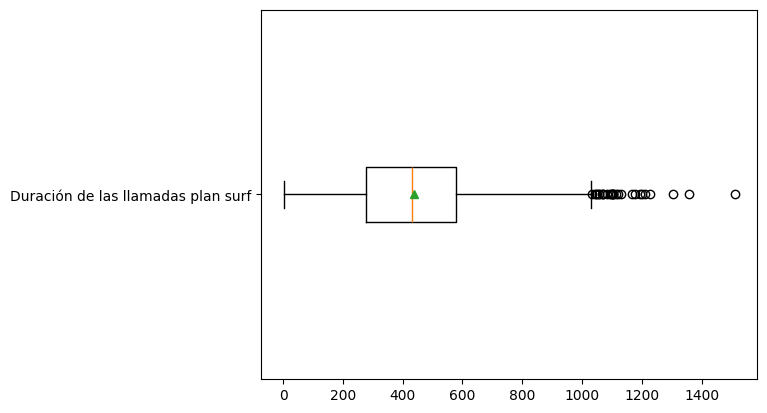


-- Diagrama de cajas para la duración de las llamadas del plan 'ultimate':



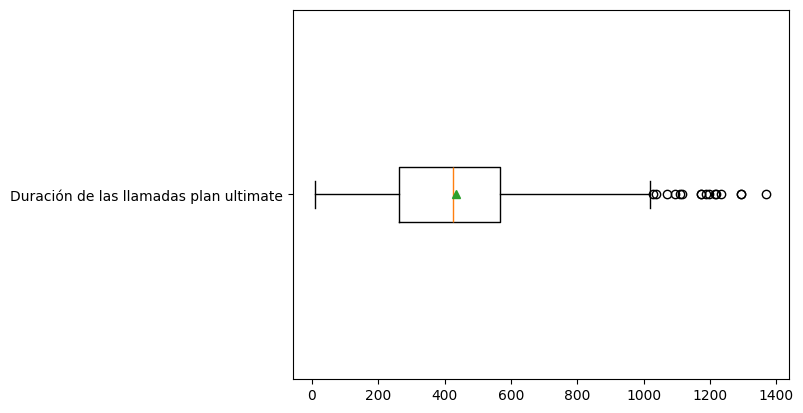

-- Mediana de las llamadas por mes en el plan 'surf': 430.00

-- Mediana de las llamadas por mes en el plan 'ultimate': 425.50



In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Se crea un boxplot para la duracion de las llamadas para cada plan, se muestra también el valor de la media
# como referencia.
print("-- Diagrama de cajas para la duración de las llamadas del plan 'surf':\n")
plt.boxplot(
    calls_plan_surf['minutes_expend'],
    showmeans = True,
    vert=False,
    labels=['Duración de las llamadas plan surf']
)
plt.show()
print()
print("-- Diagrama de cajas para la duración de las llamadas del plan 'ultimate':\n")
plt.boxplot(
    calls_plan_ultimate['minutes_expend'],
    showmeans = True, 
    vert=False,
    labels=['Duración de las llamadas plan ultimate']
)
plt.show()

# Se calcula la mediana de las llamadas para el plan surf
print(f"-- Mediana de las llamadas por mes en el plan 'surf': {calls_plan_surf['minutes_expend'].median():.2f}")
print()

# Se calcula la mediana de las llamadas para el plan ultimate
print(f"-- Mediana de las llamadas por mes en el plan 'ultimate': {calls_plan_ultimate['minutes_expend'].median():.2f}")
print()

#### Conclusiones acerca de las llamadas
- Se observa que la media de la duración de las llamadas es similar, pero en promedio las llamadas del plan `'surf'` duran dos minutos más con respecto a la media de la duración de las llamadas del plan `'ultimate'`.
- La distribución de las llamadas en los dos planes siguen un patrón similar. Las dos distribuciones siguen la forma de una distribución normal y están sesgadas a la izquierda, tal como lo muestran los gráficos, y se confirma con el hecho que la mediana de la duración de llamadas de los dos planes es menor a su media respectiva.
- Para el cálculo estadístico y los gráficos no se tuvo en cuenta las llamadas con duración $0 \,minutos$.

### Mensajes

-- Subset para el plan 'surf': 
     user_id  plan      month  messages_expend
720     1001  surf     August             30.0
721     1001  surf   December             44.0
722     1001  surf   November             36.0
723     1001  surf    October             53.0
724     1001  surf  September             44.0

-- Subset para el plan 'ultimate': 
   user_id      plan     month  messages_expend
0     1000  ultimate  December             11.0
1     1006  ultimate  December            139.0
2     1006  ultimate  November             15.0
3     1008  ultimate  December             26.0
4     1008  ultimate  November             37.0

-- Cantidad promedio de mensajes enviados en el plan 'surf': 40.11

-- Cantidad promedio de mensajes enviados en el plan 'ultimate': 46.30

-- Mensajes por mes plan 'surf':
month
January       21.0
February     108.0
March        351.0
April        870.0
May         1849.0
Name: messages_expend, dtype: float64

Mensajes enviados por mes para  el plan 'surf':

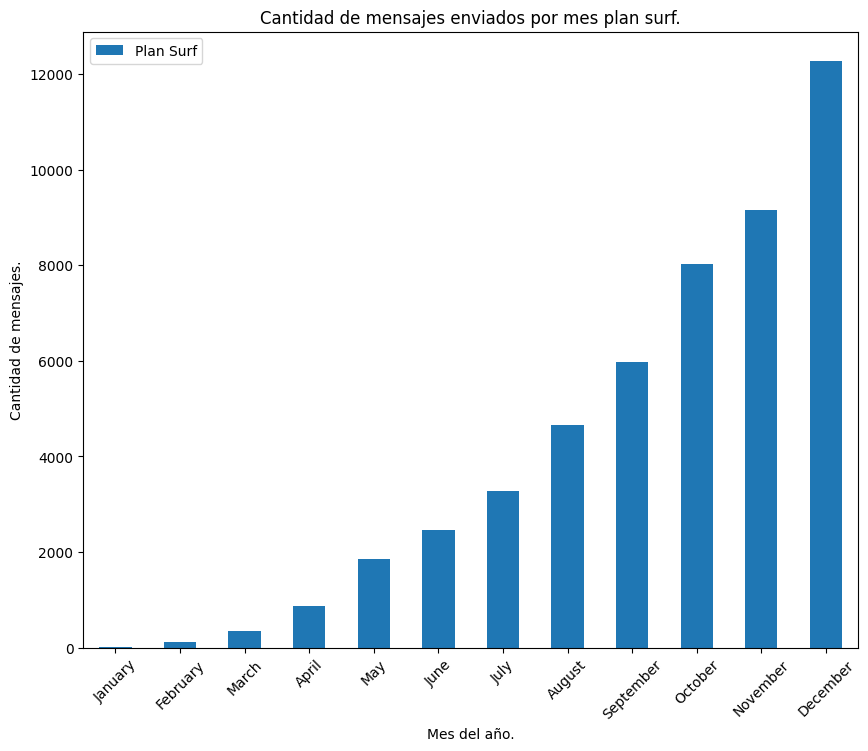

-- Mensajes por mes plan 'ultimate':
month
January      62.0
February    151.0
March       243.0
April       463.0
May         931.0
Name: messages_expend, dtype: float64

Mensajes enviados por mes para  el plan 'ultimate':



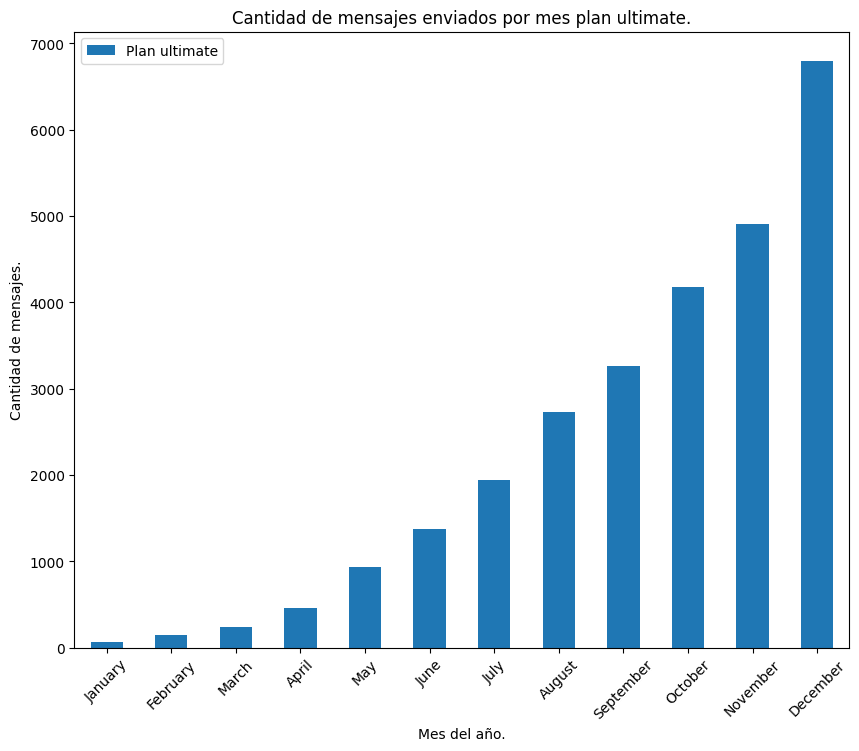

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Se crean los querys para filtrar los datos requeridos
cols = ['user_id', 'plan', 'month', 'messages_expend']
q_m_surf = "(plan == 'surf') and (messages_expend > 0)"
q_m_ultimate = "(plan == 'ultimate') and (messages_expend > 0)"

# Se crea el subset 'messages_plan_surf' para almacenar la información para el plan 'surf'
messages_plan_surf = expends_per_user_tariff.query(q_m_surf)[cols]
print(f"-- Subset para el plan 'surf': \n{messages_plan_surf.head(5)}")
print()

# Se crea el subset 'messages_plan_ultimate' para almacenar la información para el plan 'ultimate'
messages_plan_ultimate = expends_per_user_tariff.query(q_m_ultimate)[cols]
print(f"-- Subset para el plan 'ultimate': \n{messages_plan_ultimate.head(5)}")
print()

# Se calcula la cantidad media de los mensajes enviados para el plan surf
print(f"-- Cantidad promedio de mensajes enviados en el plan 'surf': {messages_plan_surf['messages_expend'].mean():.2f}")
print()
# Se calcula la cantidad media de los mensajes enviados par el plan ultimate
print(f"-- Cantidad promedio de mensajes enviados en el plan 'ultimate': {messages_plan_ultimate['messages_expend'].mean():.2f}")
print()

# Se obtiene el número de mensajes enviados cada mes, de acuerdo al plan, y luego se grafica dicho resultado.

# Mensajes enviados por mes para el plan surf.
messages_surf =  messages_plan_surf.groupby('month')['messages_expend'].sum().sort_values()
print(f"-- Mensajes por mes plan 'surf':\n{messages_surf.head(5)}")
print()

print("Mensajes enviados por mes para  el plan 'surf':\n")
messages_surf.plot(
    x='month',
    y='messages_expend',
    kind='bar',
    title='Cantidad de mensajes enviados por mes plan surf.',
    xlabel='Mes del año.',
    ylabel="Cantidad de mensajes.",
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan Surf'])
plt.show()

# Mensajes enviados por mes para el plan ultimate.
messages_ultimate =  messages_plan_ultimate.groupby('month')['messages_expend'].sum().sort_values()
print(f"-- Mensajes por mes plan 'ultimate':\n{messages_ultimate.head(5)}")
print()

print("Mensajes enviados por mes para  el plan 'ultimate':\n")
messages_ultimate.plot(
    x='month',
    y='messages_expend',
    kind='bar',
    title='Cantidad de mensajes enviados por mes plan ultimate.',
    xlabel='Mes del año.',
    ylabel="Cantidad de mensajes.",
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan ultimate'])
plt.show()


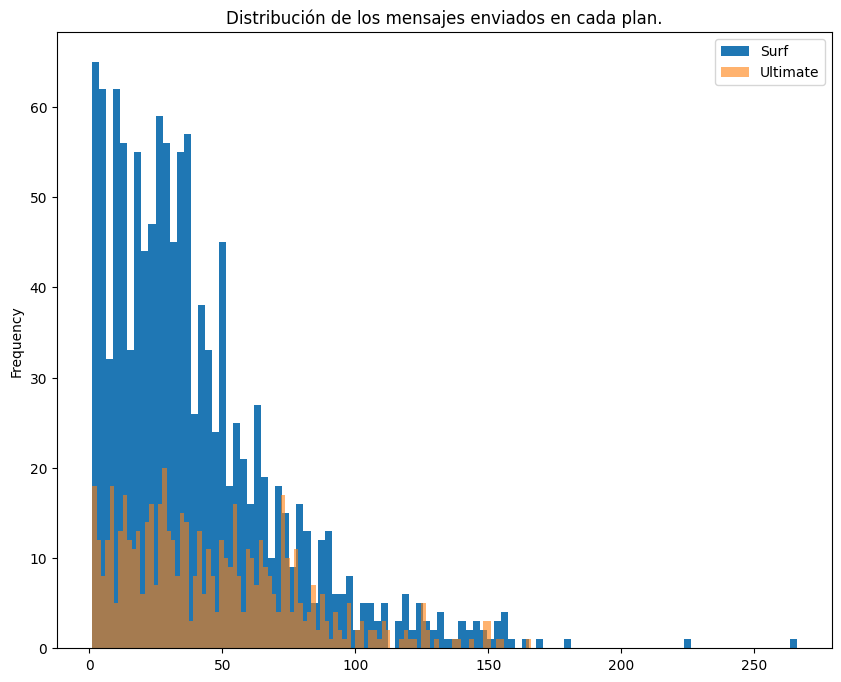

In [37]:
# Compara el número de mensaje mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Se crea un histograma doble para mostrar la cantidad de mensajes consumidas en cada plan
messages_plan_surf['messages_expend'].plot(
    kind='hist',
    bins=100,
    title='Distribución de los mensajes enviados en cada plan.',
    xlabel='Cantidad de mensajes',
    ylabel='Frequency',
    figsize=(10, 8)
    

)
messages_plan_ultimate['messages_expend'].plot(
    kind='hist',
    bins=100,
    alpha=0.6
)

plt.legend(['Surf', 'Ultimate'])
plt.show()


In [38]:
# Calcula la media y la varianza de la cantidad mensajes.

# Se calcula la cantidad de mensajes para el plan surf
print(f"-- Cantidad promedio de mensajes enviados en el plan 'surf': {messages_plan_surf['messages_expend'].mean():.2f}")
print()

# Se calcula la mediana de la cantidad de mensajes para el plan surf
print(f"-- Mediana cantidad de mensajes enviados en el plan 'surf': {messages_plan_surf['messages_expend'].median():.2f}")
print()

# Se calcula la varianza de la la cantidad de mensajes para el plan surf
print(f"-- Varianza cantidad de mensajes enviados en el plan 'surf': {np.var(messages_plan_surf['messages_expend']):.2f}")
print()

# Sa calcula la media de la cantidad de mensajes para el plan ultimate
print(f"-- Cantidad promedio de mensajes enviados en el plan 'ultimate': {messages_plan_ultimate['messages_expend'].mean():.2f}")
print()

# Se calcula la mediana de la cantidad de mensajes para el plan ultimate
print(f"-- Mediana cantidad de mensajes enviados en el plan 'ultimate': {messages_plan_ultimate['messages_expend'].median():.2f}")
print()

# Se calcula la varianza de la la cantidad de mensajes para el plan ultimate
print(f"-- Varianza cantidad de mensajes enviados en el plan 'ultimate': {np.var(messages_plan_ultimate['messages_expend']):.2f}")


-- Cantidad promedio de mensajes enviados en el plan 'surf': 40.11

-- Mediana cantidad de mensajes enviados en el plan 'surf': 32.00

-- Varianza cantidad de mensajes enviados en el plan 'surf': 1090.45

-- Cantidad promedio de mensajes enviados en el plan 'ultimate': 46.30

-- Mediana cantidad de mensajes enviados en el plan 'ultimate': 41.00

-- Varianza cantidad de mensajes enviados en el plan 'ultimate': 1083.32


-- Diagrama de cajas para la cantidad de mensajes enviados en el plan 'surf':



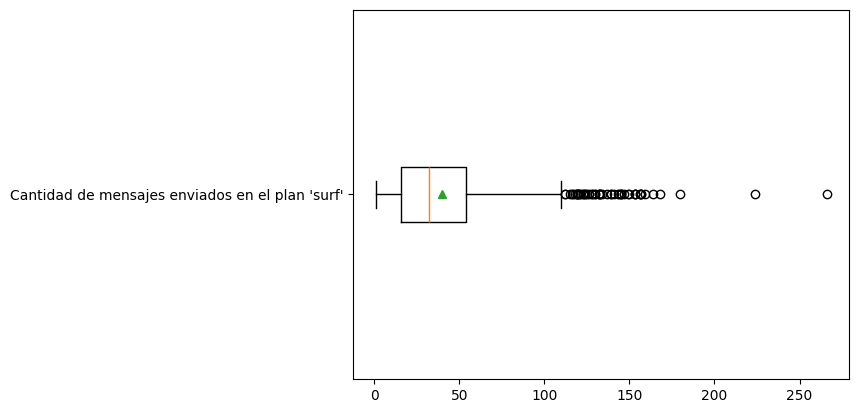


-- Diagrama de cajas para la cantidad de mensajes enviados en el 'ultimate':



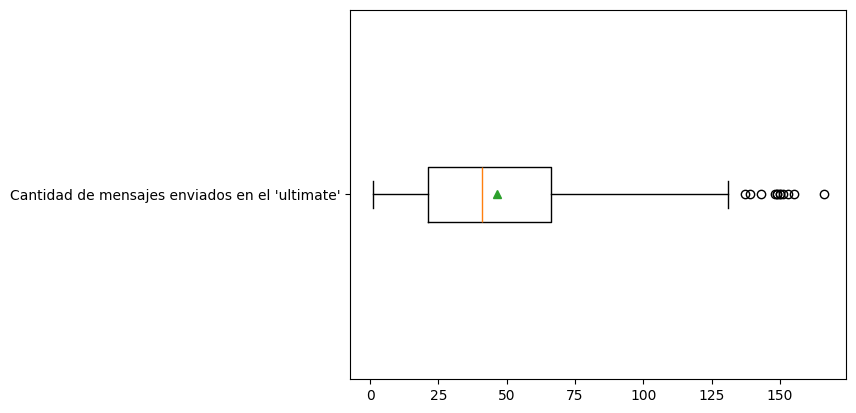

-- Mediana cantidad de mensajes enviados en el plan 'surf': 32.00

-- Mediana cantidad de mensajes enviados en el plan 'ultimate': 41.00



In [39]:
# Se crea un boxplot para la cantidad de mensajes enviados en cada plan, se muestra también el valor de la media
# como referencia.
print("-- Diagrama de cajas para la cantidad de mensajes enviados en el plan 'surf':\n")
plt.boxplot(
    messages_plan_surf['messages_expend'],
    showmeans = True,
    vert=False,
    labels=["Cantidad de mensajes enviados en el plan 'surf'"]
)
plt.show()
print()
print("-- Diagrama de cajas para la cantidad de mensajes enviados en el 'ultimate':\n")
plt.boxplot(
    messages_plan_ultimate['messages_expend'],
    showmeans = True, 
    vert=False,
    labels=["Cantidad de mensajes enviados en el 'ultimate'"]
)
plt.show()

# Se calcula la mediana de la cantidad de mensajes para el plan surf
print(f"-- Mediana cantidad de mensajes enviados en el plan 'surf': {messages_plan_surf['messages_expend'].median():.2f}")
print()


# Se calcula la mediana de la cantidad de mensajes para el plan ultimate
print(f"-- Mediana cantidad de mensajes enviados en el plan 'ultimate': {messages_plan_ultimate['messages_expend'].median():.2f}")
print()

#### Conclusiones acerca de los mensajes
- Se observa que en promedio los clientes del plan `'ultimate'` envían mas mensajes de texto que los clientes del plan `'surf'`.
- Las distribución del envío de mensajes en los dos planes sigue un patrón similar, y dicha distribución está sesgada a la izquierda, concuerda con que la mediana sea menor a le media en los dos planes.
- Para el cálculo estadístico y los gráficos no se tuvo en cuenta los usuarios que no enviaron mensajes.

### Internet

-- Subset para el plan 'surf': 
     user_id  plan      month  gb_traffic_expend
720     1001  surf     August           6.756982
721     1001  surf   December          18.915215
722     1001  surf   November          18.070605
723     1001  surf    October          21.807119
724     1001  surf  September          13.002754

-- Subset para el plan 'ultimate': 
   user_id      plan     month  gb_traffic_expend
0     1000  ultimate  December           1.856904
1     1006  ultimate  December          31.366035
2     1006  ultimate  November           2.019893
3     1008  ultimate  December          14.345049
4     1008  ultimate  November          23.121797

-- Cantidad promedio de tráfico en el plan 'surf': 16.33

-- Cantidad promedio de tráfico en el plan 'ultimate': 16.83

-- Tráfico por mes plan 'surf':
month
January        9.521211
February     107.040615
March        299.751094
April        585.166162
May         1047.948564
Name: gb_traffic_expend, dtype: float64

Tráfico de datos 

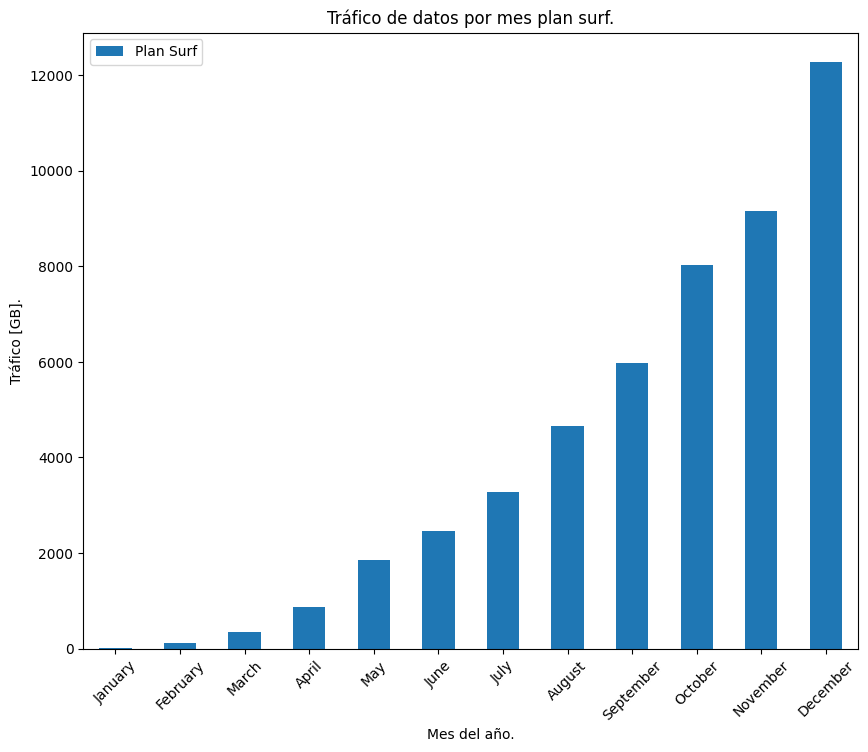

-- Tráfico por mes plan 'ultimate':
month
January      27.023799
February    117.091465
March       214.705293
April       330.619873
May         470.810537
Name: gb_traffic_expend, dtype: float64

Tráfico de datos por mes para  el plan 'ultimate':



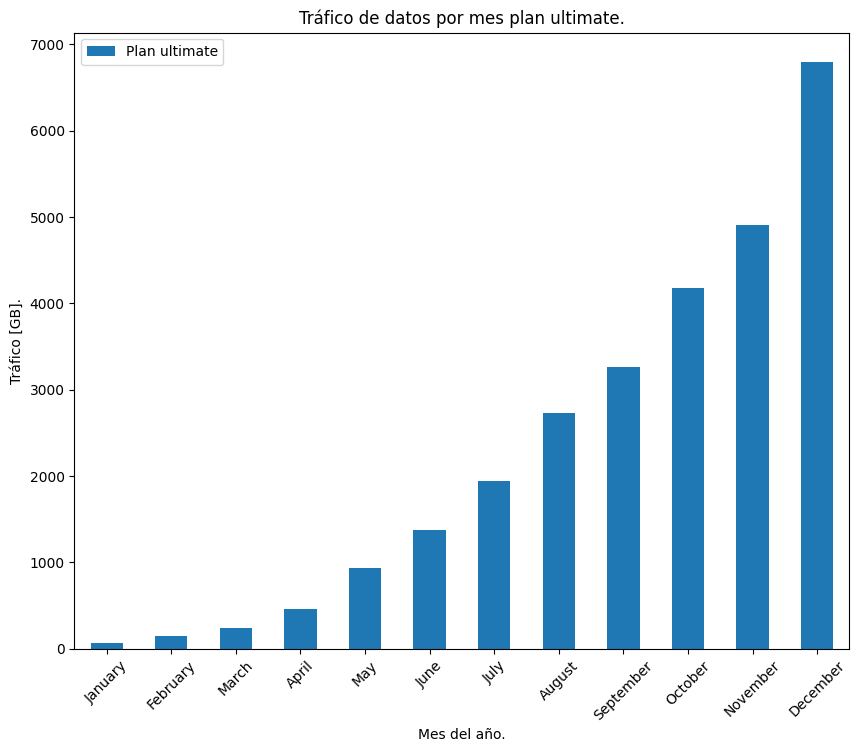

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Se crean los querys para filtrar los datos requeridos
cols = ['user_id', 'plan', 'month', 'gb_traffic_expend']
q_i_surf = "(plan == 'surf') and (gb_traffic_expend > 0)"
q_i_ultimate = "(plan == 'ultimate') and (gb_traffic_expend > 0)"

# Se crea el subset 'traffic_plan_surf' para almacenar la información de tráfico de datos para el plan 'surf'
traffic_plan_surf = expends_per_user_tariff.query(q_i_surf)[cols]
print(f"-- Subset para el plan 'surf': \n{traffic_plan_surf.head(5)}")
print()

# Se crea el subset 'traffic_plan_ultimate' para almacenar la información de tráfico de datos 
#para el plan 'ultimate'

traffic_plan_ultimate = expends_per_user_tariff.query(q_i_ultimate)[cols]
print(f"-- Subset para el plan 'ultimate': \n{traffic_plan_ultimate.head(5)}")
print()

# Se calcula la cantidad media de tráfico para el plan surf
print(f"-- Cantidad promedio de tráfico en el plan 'surf': {traffic_plan_surf['gb_traffic_expend'].mean():.2f}")
print()
# Se calcula la cantidad media de tráfico enviados par el plan ultimate
print(f"-- Cantidad promedio de tráfico en el plan 'ultimate': {traffic_plan_ultimate['gb_traffic_expend'].mean():.2f}")
print()

# Se obtiene el datos de cada mes, de acuerdo al plan, y luego se grafica dicho resultado.
# Tráfico de datos por mes para el plan surf.
traffic_surf =  traffic_plan_surf.groupby('month')['gb_traffic_expend'].sum().sort_values()
print(f"-- Tráfico por mes plan 'surf':\n{traffic_surf.head(5)}")
print()

print("Tráfico de datos por mes para  el plan 'surf':\n")
messages_surf.plot(
    x='month',
    y='gb_traffic_expend',
    kind='bar',
    title='Tráfico de datos por mes plan surf.',
    xlabel='Mes del año.',
    ylabel="Tráfico [GB].",
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan Surf'])
plt.show()

# Mensajes enviados por mes para el plan ultimate.
traffic_ultimate =  traffic_plan_ultimate.groupby('month')['gb_traffic_expend'].sum().sort_values()
print(f"-- Tráfico por mes plan 'ultimate':\n{traffic_ultimate.head(5)}")
print()

print("Tráfico de datos por mes para  el plan 'ultimate':\n")
messages_ultimate.plot(
    x='month',
    y='gb_traffic_expend',
    kind='bar',
    title='Tráfico de datos por mes plan ultimate.',
    xlabel='Mes del año.',
    ylabel="Tráfico [GB].",
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan ultimate'])
plt.show()

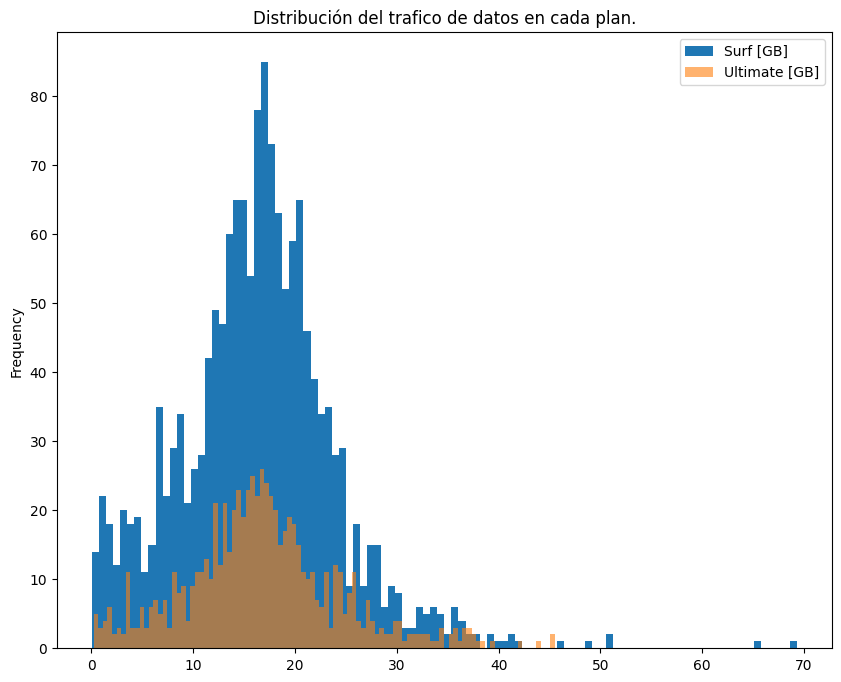

In [41]:
# Compara el tráfico de datos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Se crea un histograma doble para mostrar tráfico de datos consumidos en cada plan
traffic_plan_surf['gb_traffic_expend'].plot(
    kind='hist',
    bins=100,
    title='Distribución del trafico de datos en cada plan.',
    xlabel='Tráfico de datos [GB]',
    ylabel='Frequency',
    figsize=(10, 8)
    

)
traffic_plan_ultimate['gb_traffic_expend'].plot(
    kind='hist',
    bins=100,
    alpha=0.6
)

plt.legend(['Surf [GB]', 'Ultimate [GB]'])
plt.show()

In [42]:
# Calcula la media y la varianza del tráfico de datos.

# Se calcula el promedio de tráfico para el plan surf
print(f"-- Tráfico promedio de datos por mes en el plan 'surf': {traffic_plan_surf['gb_traffic_expend'].mean():.2f}")
print()

# Se calcula la mediana del tráfico para el plan surf
print(f"-- Mediana del tráfico datos por mes en el plan 'surf': {traffic_plan_surf['gb_traffic_expend'].median():.2f}")
print()

# Se calcula la varianza del tráfico para el plan surf
print(f"-- Varianza de tráfico de datos por mes en el plan 'surf': {np.var(traffic_plan_surf['gb_traffic_expend']):.2f}")
print()

# Sa calcula el promedio de tráfico para el plan ultimate
print(f"-- Tráfico promedio de datos por mes en el plan 'ultimate': {traffic_plan_ultimate['gb_traffic_expend'].mean():.2f}")
print()

# Se calcula la mediana tráfico para el plan ultimate
print(f"-- Mediana del tráfico datos por mes en el plan 'ultimate': {traffic_plan_ultimate['gb_traffic_expend'].median():.2f}")
print()

# Se calcula la varianza del tráfico para el plan ultimate
print(f"-- Varianza de tráfico de datos por mes en el plan 'ultimate': {np.var(traffic_plan_ultimate['gb_traffic_expend']):.2f}")


-- Tráfico promedio de datos por mes en el plan 'surf': 16.33

-- Mediana del tráfico datos por mes en el plan 'surf': 16.53

-- Varianza de tráfico de datos por mes en el plan 'surf': 59.25

-- Tráfico promedio de datos por mes en el plan 'ultimate': 16.83

-- Mediana del tráfico datos por mes en el plan 'ultimate': 16.47

-- Varianza de tráfico de datos por mes en el plan 'ultimate': 58.40


-- Diagrama de cajas para el tráfico de datos en el plan 'surf':



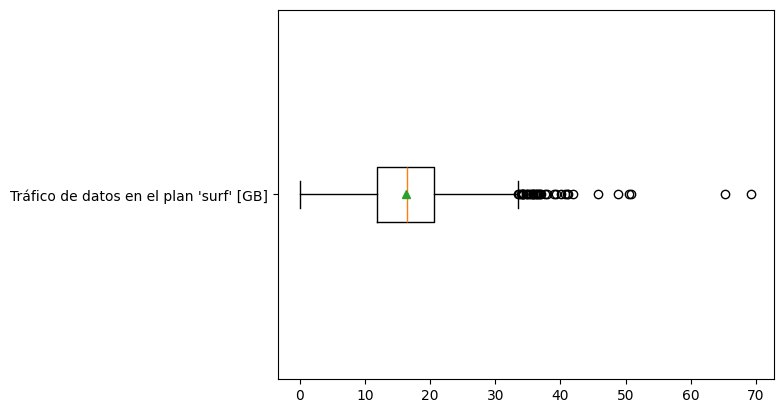


-- Diagrama de cajas para el tráfico de datos en el plan 'ultimate':



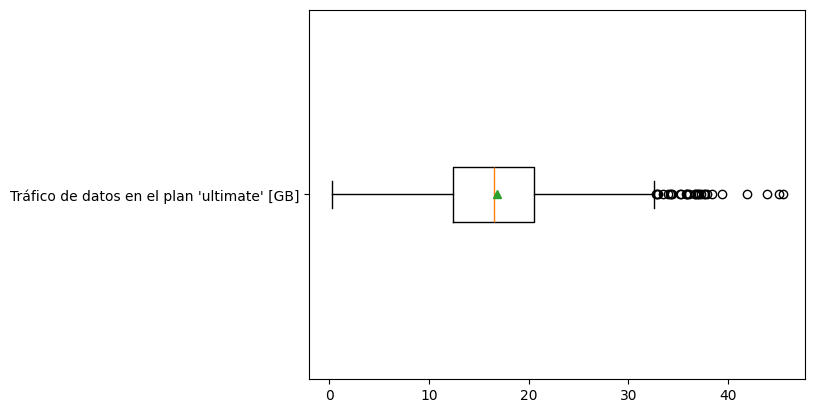

-- Mediana del tráfico de datos en el plan 'surf': 16.53

-- Mediana del tráfico de datos en el plan 'ultimate': 16.47



In [43]:
# Se crea un boxplot para el tráfico de datos en cada plan, se muestra también el valor de la media
# como referencia.
print("-- Diagrama de cajas para el tráfico de datos en el plan 'surf':\n")
plt.boxplot(
    traffic_plan_surf['gb_traffic_expend'],
    showmeans = True,
    vert=False,
    labels=["Tráfico de datos en el plan 'surf' [GB]"]
)
plt.show()
print()

print("-- Diagrama de cajas para el tráfico de datos en el plan 'ultimate':\n")
plt.boxplot(
    traffic_plan_ultimate['gb_traffic_expend'],
    showmeans = True, 
    vert=False,
    labels=["Tráfico de datos en el plan 'ultimate' [GB]"]
)
plt.show()

# Se calcula la mediana de la cantidad de mensajes para el plan surf
print(f"-- Mediana del tráfico de datos en el plan 'surf': {traffic_plan_surf['gb_traffic_expend'].median():.2f}")
print()


# Se calcula la mediana de la cantidad de mensajes para el plan ultimate
print(f"-- Mediana del tráfico de datos en el plan 'ultimate': {traffic_plan_ultimate['gb_traffic_expend'].median():.2f}")
print()

#### Conclusiones acerca de internet
- Se observa que en promedio los clientes consume una cantidad de tráfico similar.
- Las distribución del tráfico de datos para ambos planes es similar. La distrbución par el plan `'surf'` sigue la forma de una distribución normal, levemente sesgada a la derecha, ya que la mediana es mayor que la media. En el caso de la distribución para el plan `'ultimate'` sigue la forma de una distribución normal levemente sesgada a la izquierda, ya que la mediana es menor a la media.
- Para el cálculo estadístico y los gráficos no se tuvo en cuenta los usuarios que consumieron datos.

## Ingreso

- Se realiza el analísis estadístico para los ingresos generados por cada plan.

-- Subset para el plan 'surf': 
     user_id  plan      month  month_user_bill
720     1001  surf     August            20.00
721     1001  surf   December            60.00
722     1001  surf   November            60.00
723     1001  surf    October            90.09
724     1001  surf  September            20.00

<class 'pandas.core.frame.DataFrame'>
Index: 1573 entries, 720 to 2292
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          1573 non-null   int64  
 1   plan             1573 non-null   object 
 2   month            1573 non-null   object 
 3   month_user_bill  1573 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.4+ KB
-- Subset para el plan 'surf': 
   user_id      plan     month  month_user_bill
0     1000  ultimate  December             70.0
1     1006  ultimate  December             84.0
2     1006  ultimate  November             70.0
3     1008  ultimat

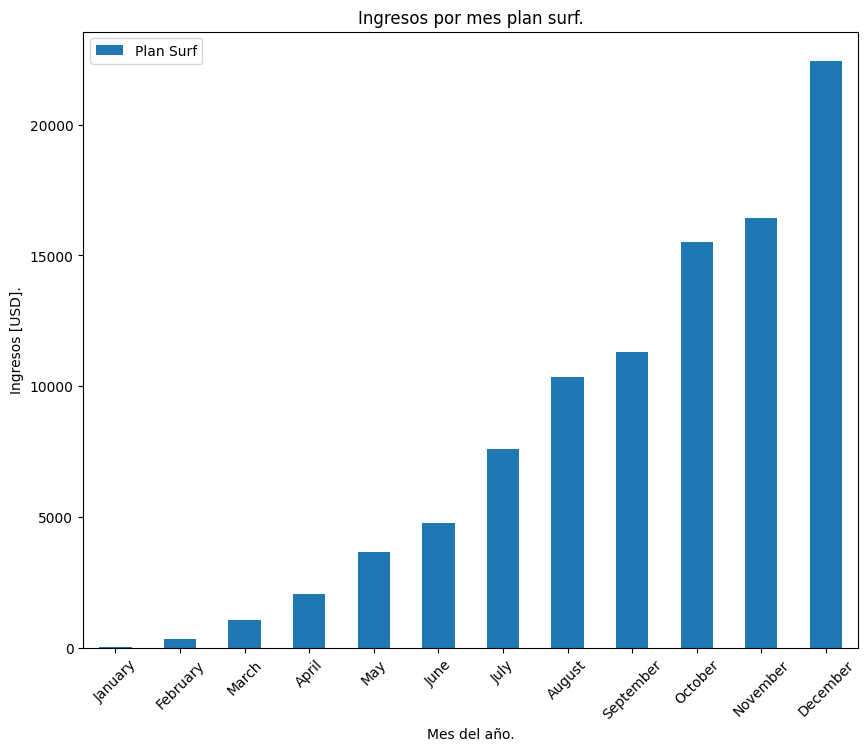

-- Ingresos por mes plan 'ultimate':
month
January        280.0
February       490.0
March          896.0
April         1533.0
May           2051.0
June          3367.0
July          4242.0
August        5173.0
September     6195.0
October       7665.0
November      9107.0
December     11067.0
Name: month_user_bill, dtype: float64

Ingresos por mes para el plan 'ultimate':



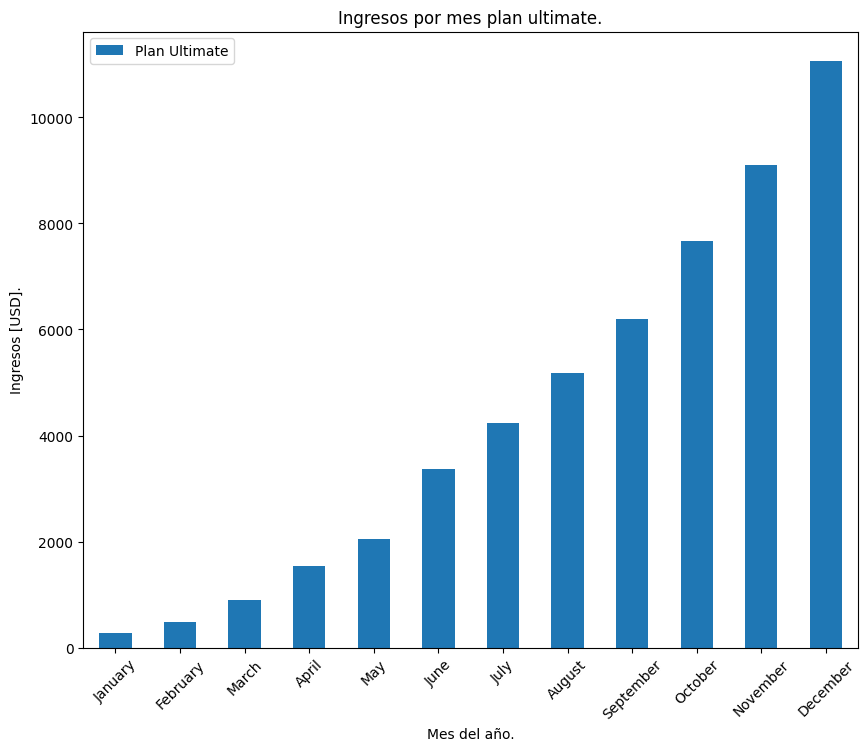

In [44]:
# Compara los ingresos totales por usuarios en cada plan
# Se crean los querys para filtrar los datos requeridos
cols = ['user_id', 'plan', 'month', 'month_user_bill']
q_b_surf = "(plan == 'surf')" #and (month_user_bill > 0)"
q_b_ultimate = "(plan == 'ultimate')" #and (month_user_bill > 0)"

# Se crea el subset 'bill_plan_surf' para almacenar la información de ingresos para el plan 'surf'
bill_plan_surf = expends_per_user_tariff.query(q_b_surf)[cols]
print(f"-- Subset para el plan 'surf': \n{bill_plan_surf.head(5)}")
print()
bill_plan_surf.info()

# Se crea el subset 'bill_plan_ultimate' para almacenar la información de ingresos para el plan 'ultimate'
bill_plan_ultimate = expends_per_user_tariff.query(q_b_ultimate)[cols]
print(f"-- Subset para el plan 'surf': \n{bill_plan_ultimate.head(5)}")
print()


# Se calcula la media de ingresos para el plan surf
print(f"-- Promedio de ingresos en el plan 'surf': {bill_plan_surf['month_user_bill'].mean():.2f}")
print()

# Se calcula la media de ingresos para el plan ultimate
print(f"-- Promedio de ingresos en el plan 'ultimate': {bill_plan_ultimate['month_user_bill'].mean():.2f}")
print()

# Se obtiene el dato de ingresos por cada mes, de acuerdo al plan, y luego se grafica dicho resultado.
# Ingresos por mes para el plan surf.
bill_surf =  bill_plan_surf.groupby('month')['month_user_bill'].sum().sort_values()
print(f"-- Ingresos por mes plan 'surf':\n{bill_surf}")
print()

print("Ingresos por mes para el plan 'surf':\n")
bill_surf.plot(
    x='month',
    y='month_user_bill',
    kind='bar',
    title='Ingresos por mes plan surf.',
    xlabel='Mes del año.',
    ylabel="Ingresos [USD].",
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan Surf'])
plt.show()

# Ingresos por mes para el plan ultimate.
bill_ultimate =  bill_plan_ultimate.groupby('month')['month_user_bill'].sum().sort_values()
print(f"-- Ingresos por mes plan 'ultimate':\n{bill_ultimate}")
print()

print("Ingresos por mes para el plan 'ultimate':\n")
bill_ultimate.plot(
    x='month',
    y='month_user_bill',
    kind='bar',
    title='Ingresos por mes plan ultimate.',
    xlabel='Mes del año.',
    ylabel="Ingresos [USD].",
    rot=45,
    figsize=(10, 8)
)
plt.legend(['Plan Ultimate'])
plt.show()

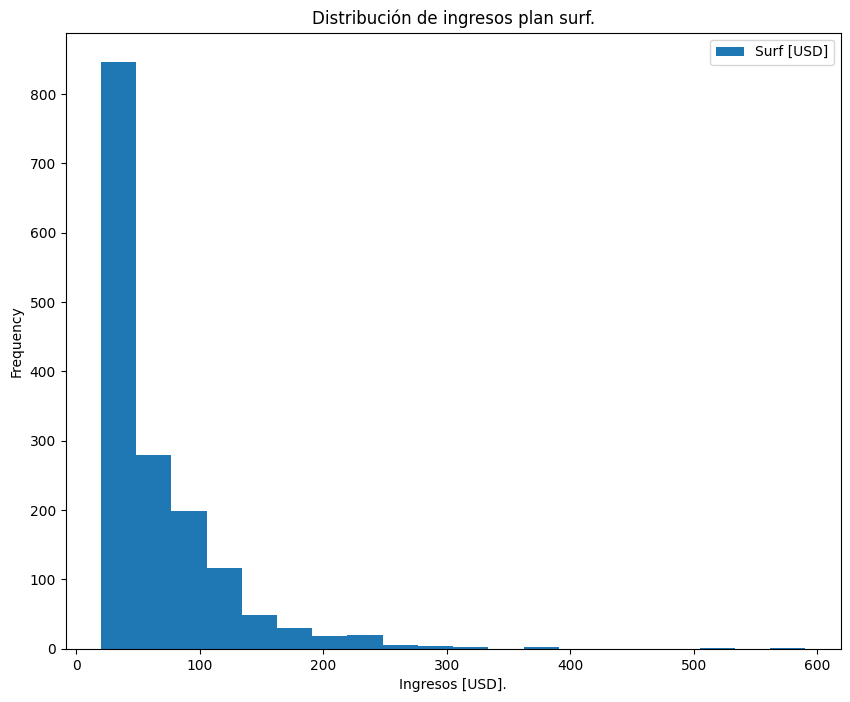

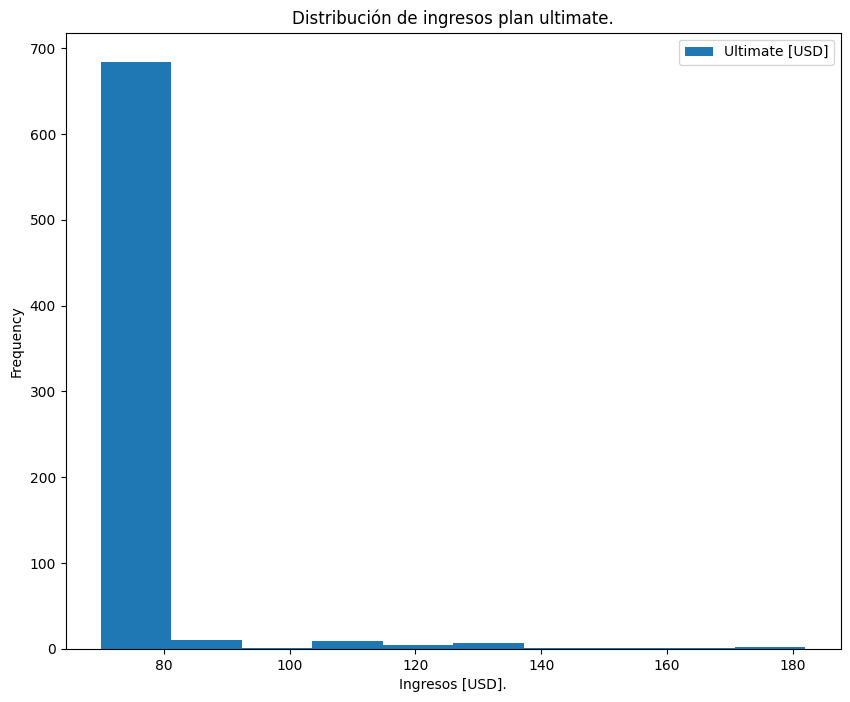

In [45]:
# Ingresos mensauales para cada plan

# Se crea un histograma doble para mostrar el ingreso por cada plan
bill_plan_surf['month_user_bill'].plot(
    kind='hist',
    bins=20,
    title='Distribución de ingresos plan surf.',
    xlabel='Ingresos [USD].',
    ylabel='Frequency',
    figsize=(10, 8)
 

)
plt.legend(['Surf [USD]'])
plt.show()

bill_plan_ultimate['month_user_bill'].plot(
    kind='hist',
    bins=10,
    title='Distribución de ingresos plan ultimate.',
    xlabel='Ingresos [USD].',
    ylabel='Frequency',
    figsize=(10, 8)
)

plt.legend(['Ultimate [USD]'])
plt.show()

In [46]:
# Calcula la media y la varianza de los ingresos.

# Se calcula el promedio de ingresos para el plan surf
print(f"-- Ingresos promedios en el plan 'surf': {bill_plan_surf['month_user_bill'].mean():.2f}")
print()

# Se calcula la mediana de los ingresos para el plan surf
print(f"-- Mediana de ingresos en el plan 'surf': {bill_plan_surf['month_user_bill'].median():.2f}")
print()

# Se calcula la varianza de los ingresso para el plan surf
print(f"-- Varianza de los ingresos en el plan 'surf': {np.var(bill_plan_surf['month_user_bill']):.2f}")
print()

# Se calcula la desviación estándar para los ingresos del plan surf
print(f"-- Desviacion estándar de los ingresos en el plan 'surf': {np.std(bill_plan_surf['month_user_bill']):.2f}")
print()


# Se calcula el promedio de ingresos para el plan ultimate
print(f"-- Ingresos promedios en el plan 'ultimate': {bill_plan_ultimate['month_user_bill'].mean():.2f}")
print()

# Se calcula la mediana de los ingresos para el plan ultimate
print(f"-- Mediana de ingresos en el plan 'ultimate': {bill_plan_ultimate['month_user_bill'].median():.2f}")
print()

# Se calcula la varianza de los ingresso para el ultimate
print(f"-- Varianza de los ingresos en el plan 'ultimate': {np.var(bill_plan_ultimate['month_user_bill']):.2f}")
print()

# Se calcula la desviación estándar para los ingresos del plan ultimate
print(f"-- Desviacion estándar de los ingresos en el plan 'ultimate': {np.std(bill_plan_ultimate['month_user_bill']):.2f}")
print()



-- Ingresos promedios en el plan 'surf': 60.71

-- Mediana de ingresos en el plan 'surf': 40.36

-- Varianza de los ingresos en el plan 'surf': 3065.88

-- Desviacion estándar de los ingresos en el plan 'surf': 55.37

-- Ingresos promedios en el plan 'ultimate': 72.31

-- Mediana de ingresos en el plan 'ultimate': 70.00

-- Varianza de los ingresos en el plan 'ultimate': 129.67

-- Desviacion estándar de los ingresos en el plan 'ultimate': 11.39



-- Diagrama de cajas para los ingresos en el plan 'surf':



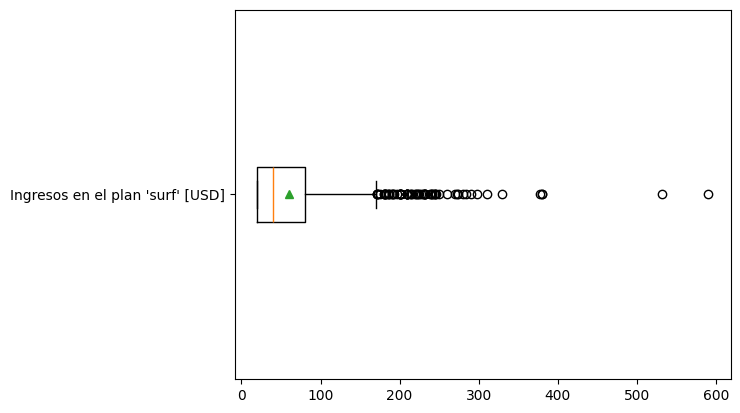


-- Diagrama de cajas para ingresos en el plan 'ultimate':



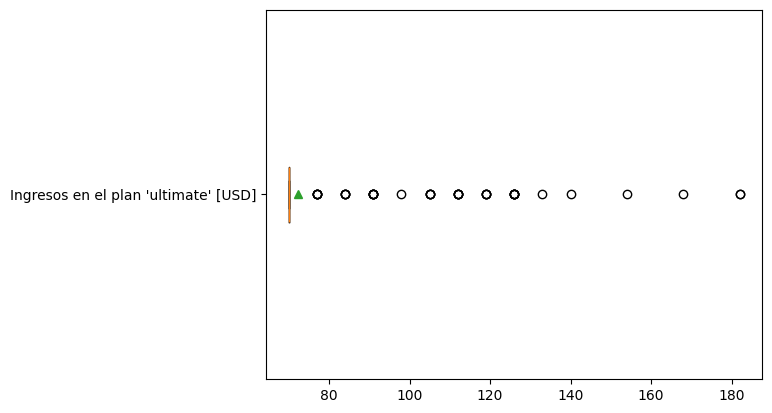

-- Mediana de ingresos en el plan 'surf': 40.36

-- Mediana de ingresos en el plan 'ultimate': 70.00



In [47]:
# Se crea un boxplot para los ingresos en cada plan, se muestra también el valor de la media como referencia.
print("-- Diagrama de cajas para los ingresos en el plan 'surf':\n")
plt.boxplot(
    bill_plan_surf['month_user_bill'],
    showmeans = True,
    vert=False,
    labels=["Ingresos en el plan 'surf' [USD]"]
)
plt.show()
print()

print("-- Diagrama de cajas para ingresos en el plan 'ultimate':\n")
plt.boxplot(
    bill_plan_ultimate['month_user_bill'],
    showmeans = True, 
    vert=False,
    labels=["Ingresos en el plan 'ultimate' [USD]"]
)
plt.show()

# Se calcula la mediana de los ingresos para el plan surf
print(f"-- Mediana de ingresos en el plan 'surf': {bill_plan_surf['month_user_bill'].median():.2f}")
print()

# Se calcula la mediana de los ingresos para el plan ultimate
print(f"-- Mediana de ingresos en el plan 'ultimate': {bill_plan_ultimate['month_user_bill'].median():.2f}")
print()


#### Conclusiones
- La media de ingresos es mayor en el plan `'ultimate'`.
- La varianza de los ingresos del plan `'surf'` es mayor que la del plan `'ultimate'`.
- Por los histogramas obtenidos y los diagrama de caja vemos que las varianzas de los ingresos no son iguales, y que los ingresos del plan `'ultimate'` no siguen una distribución normal.
- Los ingresos en el plan `'ultimate'` tienden a ser ingresos fijos, o muy cercanos al valor del plan, quizás esto se presente a que dadas las condiciones del plan, los usuarios no tienen excedentes de consumos.

## Prueba las hipótesis estadísticas

#### Hipótesis nula y alternativa promedio de ingresos por plan: 
- $H_0$: El ingreso promedio procedente de los dos planes son iguales.
- $H_1$: El ingreso promedio procedente de los dos planes son diferentes.

##### Consideraciones prueba de hipótesis
- Se realiza el filtro de valore atípicos para los ingresos en el plan `'surf'`. Para lo cual se utiliza el limite superior del rango intercuartílico, teniendo en cuenta el diagrama de cajas obtenido para los ingresos de este plan.
- Para el plan `'ultimate'`, teniendo en cuanta que la ***desviacion estándar es pequeña***, al igual que la ***varianza***, y también teniendo en cuenta el diagrama de cajas obtenido, no se filtran valores atípicos.
- De acuerdo con los histogramas de ingresos obtenidos,y los diagramas de caja se considera que las medias para los ingresos de cada plan ***no son iguales***.
- Para la prueba de hipótesis se formula una ***hipótesis sobre la igualdad de las medias de dos poblaciones***.
- Se define el valor: $alpha = 0.05$

In [48]:
# Prueba las hipótesis

# Eliminar valores atípicos de los ingresos del plan surf
Q3 = bill_plan_surf['month_user_bill'].quantile(q=0.75)
IQR = bill_plan_surf['month_user_bill'].apply(st.iqr)

# Se filtra el dataset  bill_plan_surf para eliminar los valores atípicos
bill_plan_surf_clean = bill_plan_surf[~(bill_plan_surf['month_user_bill'] > (Q3+1.5*IQR))]
print(f"-- Una muestra del dataset sin valores atípicos: \n{bill_plan_surf_clean.head(5)}")
print()

# Se establece el valor  alpha en 0.05
alpha = 0.05

# Se realiza la prueba de hipótesis considerando que los dos datasets a comparar tienen varianzas diferentes
result_test = st.ttest_ind(bill_plan_surf_clean['month_user_bill'], bill_plan_ultimate['month_user_bill'], equal_var=False)
print('Valor p:', result_test.pvalue)
print()

# Se compara el valor 'p' obtenido con el nivel de significacion estadistica
if result_test.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula.")
print()

print(f"-- Varianza de los ingresos del plan 'surf': {np.var(bill_plan_surf_clean['month_user_bill']):.2f}")
print(f"-- Varianza de los ingresos del plan 'ultimate': {np.var(bill_plan_ultimate['month_user_bill']):.2f}")


-- Una muestra del dataset sin valores atípicos: 
     user_id  plan      month  month_user_bill
720     1001  surf     August             20.0
721     1001  surf   December             60.0
722     1001  surf   November             60.0
724     1001  surf  September             20.0
725     1002  surf   December             20.0

Valor p: 0.0

Se rechaza la hipótesis nula

-- Varianza de los ingresos del plan 'surf': 375.35
-- Varianza de los ingresos del plan 'ultimate': 129.67


#### Hipótesis nula y alternativa de ingresos por región
- $H_0$: El ingreso promedio de los usuarios del área ***NY-NJ*** es igual al de los usuarios de otras regiones.
- $H_1$: El ingreso promedio de los usuarios del área ***NY-NJ*** es diferente al de los usuarios de otras regiones.

##### Consideraciones prueba de hipótesis
- Se obtienen dos subsets, a partir del dataset: `'expends_per_user'`,  para tener, en un subset los usuarios del área ***NY-NJ*** , y en otro los de otras regiones.
- No se hace distinción del plan al que se encuentra subscripto el usuario.
- Se realiza el filtro de los valores atípicos en los ingresos para cada subset.
- Para la prueba de hipótesis se formula una ***hipótesis sobre la igualdad de las medias de dos poblaciones***.
- Se define el valor: $alpha = 0.05$

##### Preparación del dataset
- A partir del dataset `'expends_per_user'` se obtienen los datos para trabajar la prueba de hipótesis.
- Es necesario hacer un merge entre el dataset `'expends_per_user'` y el `'users'` para obtner la region de cada usuatio.
- Se subdivide el dataset para tener los datos de usuarios de acuerdo a la región.
- Se describe estádisticamente los datasets obtenidos.

In [49]:
# Preparacion del dataset
print(f"-- Una muestra del dataset 'expends_per_user':\n {expends_per_user_tariff[['user_id', 'month', 'month_user_bill']].head(5)}")
print()
# Se crea un nuevo dataset con la información del usuario y la facturacion por mes
bill_per_user = expends_per_user_tariff[['user_id', 'month', 'month_user_bill']]
print(f"-- Una muestra del dataset 'bill_per_user':\n {bill_per_user.head(5)}")
print()

# Se agrega la información de la región del usuario
bill_per_user = bill_per_user.merge(users[['user_id', 'city']], on='user_id', how='left')
print(f"-- Usuarios, ingresos por mes y ciudad:\n{bill_per_user.sample(n=5, random_state=1)}")
print()

# Se subdivide el dataset 'bill_per_user' en regiones
# Usuarios de New York-Newark-Jersey City
bill_per_user_nynj = bill_per_user[bill_per_user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
print(f"-- Usuarios de la ciudad 'New York-Newark-Jersey City':\n {bill_per_user_nynj.head(5)}")
print()

# Usuarios de otras ciudades
bill_per_user_other_cities = bill_per_user[~(bill_per_user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')]
print(f"-- Usuarios de otras ciudades:\n {bill_per_user_other_cities.head(5)}")


-- Una muestra del dataset 'expends_per_user':
    user_id     month  month_user_bill
0     1000  December             70.0
1     1006  December             84.0
2     1006  November             70.0
3     1008  December             70.0
4     1008  November             70.0

-- Una muestra del dataset 'bill_per_user':
    user_id     month  month_user_bill
0     1000  December             70.0
1     1006  December             84.0
2     1006  November             70.0
3     1008  December             70.0
4     1008  November             70.0

-- Usuarios, ingresos por mes y ciudad:
      user_id     month  month_user_bill  \
1447     1221  December            20.00   
898      1066  December            50.30   
1862     1348  November            27.71   
1721     1313  December            24.20   
987      1084  November            93.11   

                                               city  
1447             Boston-Cambridge-Newton, MA-NH MSA  
898              Boston-Cambridge-Ne

-- Ingresos por mes provenientes de 'New York-Newark-Jersey City': 
 month
February      90.00
March        246.84
April        575.67
May          863.37
June        1148.54
Name: month_user_bill, dtype: float64

-- Ingresos por mes provenientes de 'New York-Newark-Jersey City':



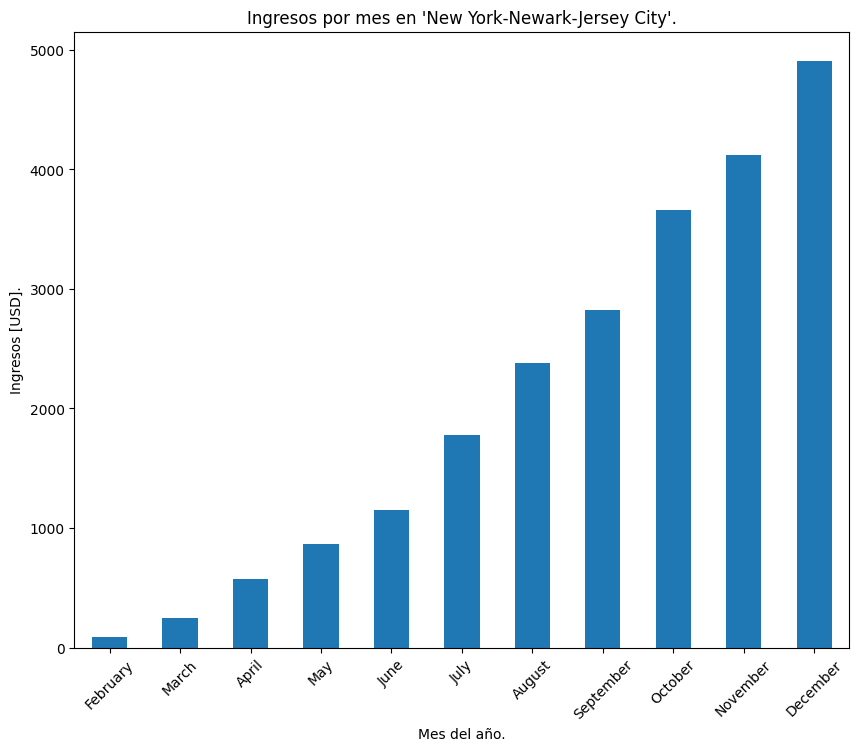

-- Ingresos por mes provenientes de otras ciudades: 
 month
January      320.00
February     709.57
March       1705.81
April       2992.86
May         4855.00
Name: month_user_bill, dtype: float64

-- Ingresos por mes provenientes de otras ciudades:



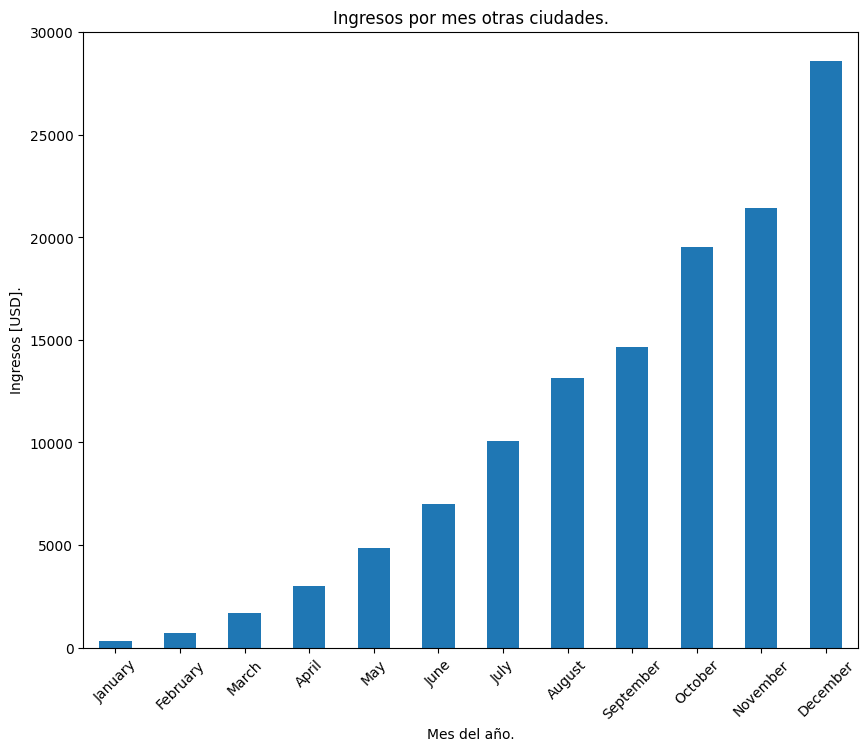

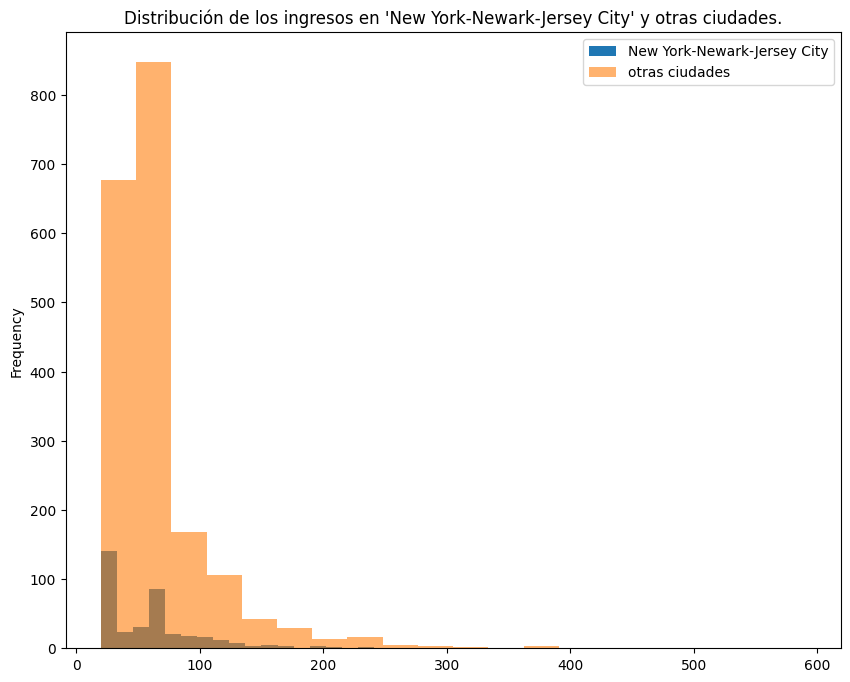

In [50]:
# Se describe estádisticamente los datasets obtenidos.
# Se calculan los ingresos por mes en las dos regiones de estudio
# Ingresos por mes en NY_NJ
bill_per_month_nynj = bill_per_user_nynj.groupby('month')['month_user_bill'].sum().sort_values()
print(f"-- Ingresos por mes provenientes de 'New York-Newark-Jersey City': \n {bill_per_month_nynj.head(5)}")
print()
print("-- Ingresos por mes provenientes de 'New York-Newark-Jersey City':\n")
bill_per_month_nynj.plot(
    x='month',
    y='month_user_bill',
    kind='bar',
    title="Ingresos por mes en 'New York-Newark-Jersey City'.",
    xlabel='Mes del año.',
    ylabel="Ingresos [USD].",
    rot=45,
    figsize=(10, 8)
)
plt.show()

# Ingresos por mes en otras ciudades
bill_per_month_other_cities = bill_per_user_other_cities.groupby('month')['month_user_bill'].sum().sort_values()
print(f"-- Ingresos por mes provenientes de otras ciudades: \n {bill_per_month_other_cities.head(5)}")
print()
print("-- Ingresos por mes provenientes de otras ciudades:\n")
bill_per_month_other_cities.plot(
    x='month',
    y='month_user_bill',
    kind='bar',
    title="Ingresos por mes otras ciudades.",
    xlabel='Mes del año.',
    ylabel="Ingresos [USD].",
    rot=45,
    figsize=(10, 8)
)
plt.show()


# Compara el el ingreso de las dos regiones de estudio.
# Se crea un histograma doble para mostrar tráfico de datos consumidos en cada región de interés
bill_per_user_nynj['month_user_bill'].plot(
    kind='hist',
    bins=20,
    title="Distribución de los ingresos en 'New York-Newark-Jersey City' y otras ciudades.",
    xlabel='Ingresos [USD]',
    ylabel='Frequency',
    figsize=(10, 8)
    

)
bill_per_user_other_cities['month_user_bill'].plot(
    kind='hist',
    bins=20,
    alpha=0.6
)

plt.legend(['New York-Newark-Jersey City', 'otras ciudades'])
plt.show()


In [51]:
# Calcula la media, la varianza y la mediana de los ingreso de acuero a la región.

# Se calcula el promedio de ingresos para NY_NJ
print(f"-- Ingreso promedio de ingresos para NY_NJ: {bill_per_user_nynj['month_user_bill'].mean():.2f}")
print()

# Se calcula la mediana de ingresos para NY_NJ
print(f"-- Mediana de ingresos para NY_NJ: {bill_per_user_nynj['month_user_bill'].median():.2f}")
print()

# Se calcula la varianza de ingresos para NY_NJ
print(f"-- Varianza de de ingresos para NY_NJ: {np.var(bill_per_user_nynj['month_user_bill']):.2f}")
print()

# Sa calcula el promedio de ingresos para otras ciudades
print(f"-- Ingreso promedio de ingresos para otras ciudades: {bill_per_user_other_cities['month_user_bill'].mean():.2f}")
print()

# Se calcula la mediana ingresos para otras ciudades
print(f"-- Mediana de ingresos para otras ciudades: {bill_per_user_other_cities['month_user_bill'].median():.2f}")
print()

# Se calcula la varianza de ingresos para otras ciudades
print(f"-- Varianza de ingresos para otras ciudades: {np.var(bill_per_user_other_cities['month_user_bill']):.2f}")


-- Ingreso promedio de ingresos para NY_NJ: 59.92

-- Mediana de ingresos para NY_NJ: 51.77

-- Varianza de de ingresos para NY_NJ: 1890.52

-- Ingreso promedio de ingresos para otras ciudades: 65.22

-- Mediana de ingresos para otras ciudades: 70.00

-- Varianza de ingresos para otras ciudades: 2223.89


-- Diagrama de cajas para el ingreso en 'New York-Newark-Jersey City':



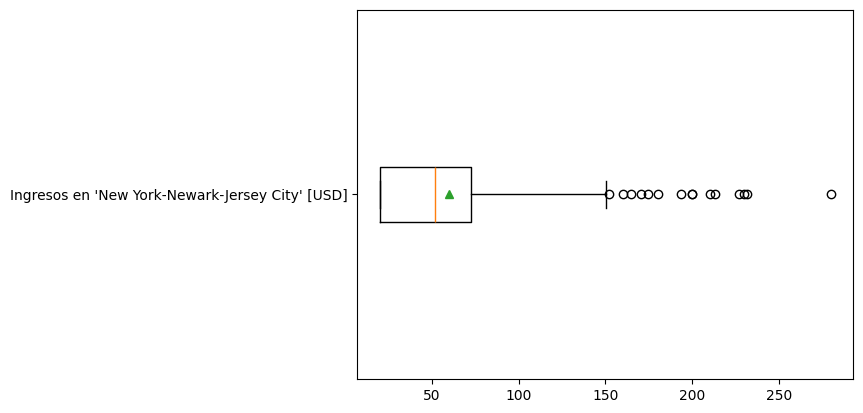


-- Diagrama de cajas para el ingreso en otras ciudades:



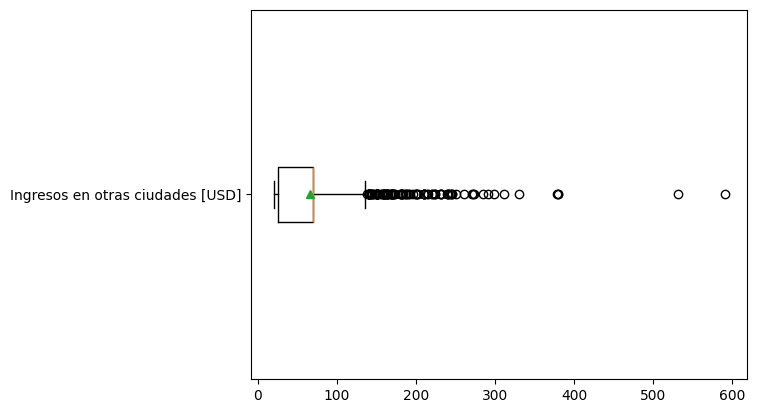

-- Mediana del ingreso en 'New York-Newark-Jersey City': 51.77

-- Mediana del ingreso en otras ciudades: 70.00



In [52]:
# Se crea un boxplot para el ingreso en cada región
print("-- Diagrama de cajas para el ingreso en 'New York-Newark-Jersey City':\n")
plt.boxplot(
    bill_per_user_nynj['month_user_bill'],
    showmeans = True,
    vert=False,
    labels=["Ingresos en 'New York-Newark-Jersey City' [USD]"]
)
plt.show()
print()

print("-- Diagrama de cajas para el ingreso en otras ciudades:\n")
plt.boxplot(
    bill_per_user_other_cities['month_user_bill'],
    showmeans = True, 
    vert=False,
    labels=["Ingresos en otras ciudades [USD]"]
)
plt.show()

# Se calcula la mediana del ingreso en otras en 'New York-Newark-Jersey City'
print(f"-- Mediana del ingreso en 'New York-Newark-Jersey City': {bill_per_user_nynj['month_user_bill'].median():.2f}")
print()


# Se calcula la mediana del ingreso en otras ciudades
print(f"-- Mediana del ingreso en otras ciudades: {bill_per_user_other_cities['month_user_bill'].median():.2f}")
print()

##### Prueba de hipótesis

In [53]:
# Prueba las hipótesis

# Eliminar valores atípicos de los ingresos en NY-NJ
Q1_nynj = bill_per_user_nynj['month_user_bill'].quantile(q=0.25)
Q3_nynj = bill_per_user_nynj['month_user_bill'].quantile(q=0.75)
IQR_nynj = bill_per_user_nynj['month_user_bill'].apply(st.iqr)

# Se filtra el dataset  bill_plan_surf para eliminar los valores atípicos
bill_per_user_nynj_clean = bill_per_user_nynj[~((bill_per_user_nynj['month_user_bill'] < (Q1_nynj-1.5*IQR_nynj)) | (bill_per_user_nynj['month_user_bill'] > (Q3_nynj+1.5*IQR_nynj)))]
print(f"-- Una muestra del dataset sin valores atípicos: \n{bill_per_user_nynj_clean.head(5)}")
print()


# Eliminar valores atípicos de los ingresos en NY-NJ
Q1_other = bill_per_user_other_cities['month_user_bill'].quantile(q=0.25)
Q3_other = bill_per_user_other_cities['month_user_bill'].quantile(q=0.75)
IQR_other = bill_per_user_other_cities['month_user_bill'].apply(st.iqr)

# Se filtra el dataset  bill_plan_surf para eliminar los valores atípicos
bill_per_user_other_clean = bill_per_user_other_cities[~((bill_per_user_other_cities['month_user_bill'] < (Q1_other-1.5*IQR_other)) | (bill_per_user_other_cities['month_user_bill'] > (Q3_other+1.5*IQR_other)))]
print(f"-- Una muestra del dataset sin valores atípicos: \n{bill_per_user_other_clean.head(5)}")
print()

# Se establece el valor  alpha en 0.05
alpha = 0.05

# Se realiza la prueba de hipótesis considerando que los dos datasets a comparar tienen varianzas diferentes
result_cities = st.ttest_ind(bill_per_user_nynj_clean['month_user_bill'], bill_per_user_other_clean['month_user_bill'], equal_var=False)
print('Valor p:', result_cities.pvalue)
print()

# Se compara el valor 'p' obtenido con el nivel de significacion estadistica
if result_test.pvalue < alpha:
    print("Se rechaza la hipótesis nula.")
else:
    print("No se puede rechazar la hipótesis nula.")
print()

print(f"-- Varianza de los ingresos 'New York-Newark-Jersey City': {np.var(bill_per_user_nynj_clean['month_user_bill']):.2f}")
print(f"-- Varianza de los ingresos en otras ciudades: {np.var(bill_per_user_other_clean['month_user_bill']):.2f}")


-- Una muestra del dataset sin valores atípicos: 
    user_id     month  month_user_bill  \
30     1031    August             70.0   
31     1031  December             70.0   
32     1031      July             70.0   
33     1031  November             70.0   
34     1031   October             70.0   

                                         city  
30  New York-Newark-Jersey City, NY-NJ-PA MSA  
31  New York-Newark-Jersey City, NY-NJ-PA MSA  
32  New York-Newark-Jersey City, NY-NJ-PA MSA  
33  New York-Newark-Jersey City, NY-NJ-PA MSA  
34  New York-Newark-Jersey City, NY-NJ-PA MSA  

-- Una muestra del dataset sin valores atípicos: 
   user_id     month  month_user_bill                                    city
0     1000  December             70.0   Atlanta-Sandy Springs-Roswell, GA MSA
2     1006  November             70.0  San Francisco-Oakland-Berkeley, CA MSA
3     1008  December             70.0       Orlando-Kissimmee-Sanford, FL MSA
4     1008  November             70.0       Or

# Conclusión general
1. Es importante trabajar con los tipos de datos adecuados para cada tipo de dato que se quiere representar.
2. Al momento de realizar la fusión de dos o mas dataset es importante entender como cambian los index de los nuevos dataset.
3. Al monemto de fusionar datasets hay que tener claro qué se quiere obtener para poder aplicar el mejor 'join' posible.
4. Es importante excluir los valores atípicos de las pruebas de hipótesis.
